# Проект: телекоммуникации

## Оператор связи «Ниединогоразрыва.ком»

### Описание

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Данные

Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Цель

 Обучить модель для прогнозирования оттока клиентов, чтобы предотвратить их уход и сохранить клиентскую базу.
 В результате  успешного обучения модели, оператор связи "Ниединогоразрыва.ком" будет в состоянии предлагать промокоды и специальные условия клиентам, которые планируют уйти, чтобы удерживать их и повышать доход.

### Основные этапы работы

#### Основные шаги


##### 1. Первичный анализ данных: ознакомление с данными и просмотр описательной статистики с помощью Pandas.



- загружаю данные
- смотрю информацию о датафреймах
- смотрю тип данных представленных в датафреймах
- смортю наличие дубликатов и пропусков

##### 2. Предварительная обработка данных:




  - объединение таблиц
  - обработка пропусков, дубликатов
  - приведение данных к нужному типу
  - создание новых признаков.

##### 3. Исследовательский анализ данных:




  - анализ распределения сумм ежемесячных платежей, типов услуг для оставшихся и ушедших пользователей
  - оценка периодичности прекращения обслуживания и количества пользователей в зависимости от даты регистрации договора
  - расчет сводных таблиц и построение графиков.

##### 4. Подготовка признаков для обучения:




  - изучение баланса классов
  - разбивка на тренировочную и тестовую выборки.
  - кодирование категориальных признаков

##### 5. Обучение моделей:




  - подбор гиперпараметров и оценка моделей при помощи AUC-ROC, F1

##### 6. Сравнительный анализ моделей и выбор наилучшей.



  - оценка лучшей модели на test выборке
  - анализ важности признаков и матрицы ошибок

##### 7. Общие выводы на основе результатов анализа данных и обучения моделей.

## Загрузка и изучение данных

In [ ]:
!pip install catboost
!pip install pingouin
!pip install phik
!pip install --upgrade catboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import catboost as cat
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime
from scipy import stats as st
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import catboost
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
import pingouin as pg
from catboost import CatBoostClassifier, Pool
from phik import phik_matrix

RANDOM_STATE = 280823


     |████████████████████████████████| 198 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.7 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 79.6 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 52.5 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 99.2 MB/s eta 0:00:01
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=01a18e075adca40bdf8f1facde5885f3baed3971c0df5e20f3eb91d07025cfac
  Stored in directory: /home/jovyan/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling 

In [ ]:
contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [ ]:
tables = {'Информация о договоре':contract,
          'Персональные данные клиента':personal,
          'Информация об интернет-услугах':internet,
          'Информация об услугах телефонии':phone}

for table_name, table in tables.items():
    print('\nРазмер таблицы:', table_name, table.shape)
    display(table.head())
    print('\nИнформация по таблице:', table_name)
    display(table.info())
    print('\nТипы данных:', table_name)
    display(table.dtypes)
    print('\nКоличество дубликатов в таблице', table_name)
    display(table.duplicated().sum())
    print('\n' + '=' * 69 + '\n')


Размер таблицы: Информация о договоре (7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



Информация по таблице: Информация о договоре
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Типы данных: Информация о договоре


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


Количество дубликатов в таблице Информация о договоре


0




Размер таблицы: Персональные данные клиента (7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Информация по таблице: Персональные данные клиента
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Типы данных: Персональные данные клиента


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object


Количество дубликатов в таблице Персональные данные клиента


0




Размер таблицы: Информация об интернет-услугах (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Информация по таблице: Информация об интернет-услугах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Типы данных: Информация об интернет-услугах


customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


Количество дубликатов в таблице Информация об интернет-услугах


0




Размер таблицы: Информация об услугах телефонии (6361, 2)


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Информация по таблице: Информация об услугах телефонии
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


Типы данных: Информация об услугах телефонии


customerID       object
MultipleLines    object
dtype: object


Количество дубликатов в таблице Информация об услугах телефонии


0

Данные загружены корректно

В таблице contract, которая содержит 7043 строки и 8 столбцов, и в таблице personal с персональными данными клиентов имеется одинаковое количество строк. Необходимо проверить, содержит ли каждая строка информацию о клиенте.

Таблицы phone и internet имеют описание данных, но такового описания нет для таблиц personal и contract.

Дубликаты и пропуски отсутствуют

Для удобства работы с данными в будущем необходимо привести столбцы к нижнему регистру.

В каждой таблице имеются значения для каждого идентификатора пользователя - customerID, что позволяет соединить датасеты для моделирования без пропущенных значений. В таблице contract содержатся даты, включая целевой признак - EndDate, который указывает на окончание контракта. Перед использованием данных для обучения модели, необходимо преобразовать даты в соответствующий формат, и проверить их период. Поскольку основные признаки категориальные, необходимо использовать технику OriginalEncoding или OHE (в зависимости от модели) для преобразования их в числовой формат.

In [ ]:
for table_name, table in tables.items():
    print(f'Статистическая сводка таблицы: {table_name}')
    display(table.describe(include='all').T)
    print()

Статистическая сводка таблицы: Информация о договоре


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,67,No,5942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043,6658,,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Статистическая сводка таблицы: Персональные данные клиента


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Статистическая сводка таблицы: Информация об интернет-услугах


,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785



Статистическая сводка таблицы: Информация об услугах телефонии


,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


**Информация о договоре:**

- В общей сложности были заключены 7043 контракта со 77 уникальными датами заключения контракта и 5 уникальными датами его завершения.
- Более 74% всех контрактов по-прежнему не завершены, что составляет 5174 контракта.
- В таблице было зарегистрировано 3 уникальных типа оплаты, с наиболее популярным типом "Month-to-month" (ежемесячный) (3875 контрактов).
- Почти все признаки, за исключением MonthlyCharges и TotalCharges, являются категориальными.
- В столбце PaperlessBilling встречаются два значения, Yes и No, и в 60% случаев выбрано значение Yes.
- Средняя ежемесячная плата для пользователей составляет 64,7 ед.
- Столбец TotalCharges содержит числа в формате object и требует перевода в нужный формат. В этом столбце также есть 11 отсутствующих значений.

**Персональные данные клиента:**

- Информация о всех 7043 пользователях, когда-либо подписывавших контракт, представлена в таблице.
- Некоторые признаки, такие как Partner и Dependents, являются категориальными и имеют по две категории.
- SeniorCitizen является числовым признаком со значениями от 0 до 1.

**Информация об интернет-услугах:**

- 5517 пользователей из 7043 пользуются услугами интернета и/или дополнительными услугами.
- Есть два варианта доступа к Интернету, и оптоволокно является наиболее популярным типом (56% пользователей).
- Отдельные столбцы содержат категориальные признаки для каждой дополнительной услуги со значениями Yes или No, но большинство пользователей не пользуется этими услугами.

**Информация об услугах телефонии:**

- Услугой пользуются 6361 пользователей из 7043
- 3390 пользователей имеют только одну телефонную линию, другие несколько.

## Предобработка данных

**Список действий для подготовки данных:**

1. Конвертирование данных в необходимый тип
2. Приведение категориальных признаков к нижнему регистру
3. Объединение всех таблиц в одну
4. Обработка пропущенных значений в полученном датасете и в 11 известных пропусков в таблице contract
5. Добавление столбцов с целевым признаком, преобразованном к 0 и 1, и столбца с количеством дней использования услуг.

### Конвертирование данных в необходимый тип

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
contract.loc[contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Для всех отсутствующих значений в столбце TotalCharges была обнаружена единая дата - 2020-02-01, что соответствует дате выгрузки датасета, соответственно обзего количества платежей еще небыло, считаю справедливым заполнить столбец TotalCharges данным из столбца MonthlyCharges, для этих конкретных пользователей
Мы заменим эти значения на NaN и преобразуем столбец в тип float.

Также мы проведем преобразование типа данных для столбцов BeginDate и EndDate в формат datetime.

In [ ]:
contract['TotalCharges'] = contract.apply(lambda row:
                                          row['MonthlyCharges'] if row['TotalCharges'] == ' '
                                          else row['TotalCharges'], axis=1)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил признак ухода клиента, ссылаясь на отсутствие даты окончания договора
    
</div>

Заменим no в столбце EndDate на дату выгрузки данных '2020-02-01', но, перед этим, убедимся, что на дату выгрузки данных нет случаев окончания договора

In [ ]:
contract.loc[contract['EndDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [ ]:
#contract.loc[contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'

In [ ]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
#contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


**Промежуточный вывод:**

1. Столбец TotalCharges таблицы contract приведен к типу float.
2. Столбец BeginDate, EndDate приведен к типу datetime.
3. Категория no в стобце EndDate заменена на дату выгрузки данных - 2020-02-01.

### Приведение категориальных признаков к нижнему регистру

In [ ]:
for column in ['customerID', 'gender', 'Partner', 'Dependents']:
    personal[column] = personal[column].str.lower()

for column in ['customerID', 'Type', 'PaperlessBilling', 'PaymentMethod']:
    contract[column] = contract[column].str.lower()

for column in internet.columns:
    internet[column] = internet[column].str.lower()

for column in phone.columns:
    phone[column] = phone[column].str.lower()

In [ ]:
for table_name, table in tables.items():
    print(table_name)
    display(table.head())

Информация о договоре


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-vhveg,2020-01-01,No,month-to-month,yes,electronic check,29.85,31.04
1,5575-gnvde,2017-04-01,No,one year,no,mailed check,56.95,2071.84
2,3668-qpybk,2019-10-01,No,month-to-month,yes,mailed check,53.85,226.17
3,7795-cfocw,2016-05-01,No,one year,no,bank transfer (automatic),42.30,1960.6
4,9237-hqitu,2019-09-01,No,month-to-month,yes,electronic check,70.70,353.5


Персональные данные клиента


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


Информация об интернет-услугах


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


Информация об услугах телефонии


,customerID,MultipleLines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


**Промежуточный вывод:**

Во всех таблицах все категориальные признаки приведены к нижнему регистру.

### Объединение таблиц

In [ ]:
data = contract.merge(internet, on='customerID', how='left')
data = data.merge(personal, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')

In [ ]:
data.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-vhveg,2020-01-01,No,month-to-month,yes,electronic check,29.85,31.04,dsl,no,yes,no,no,no,no,female,0,yes,no,NaN
1,5575-gnvde,2017-04-01,No,one year,no,mailed check,56.95,2071.84,dsl,yes,no,yes,no,no,no,male,0,no,no,no
2,3668-qpybk,2019-10-01,No,month-to-month,yes,mailed check,53.85,226.17,dsl,yes,yes,no,no,no,no,male,0,no,no,no
3,7795-cfocw,2016-05-01,No,one year,no,bank transfer (automatic),42.30,1960.6,dsl,yes,no,yes,yes,no,no,male,0,no,no,NaN
4,9237-hqitu,2019-09-01,No,month-to-month,yes,electronic check,70.70,353.5,fiber optic,no,no,no,no,no,no,female,0,no,no,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

**Промежуточный вывод:**

Все данные объединены в общий датасет, размером 7043 строк и 20 столбцов

Все изначальные данные были сохранены

Т.к. не все ползователи пользовались абсолютно всеми услугами провайдера, логично, что в объединенном датасете будут присутствовать пропуски

### Обработка пропущенных значений

In [ ]:
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

В обединенном датасете присутствует 1526 пропуска в каждом столбце, относящемуся к одному из изначальных датасетов "internet". Данные в столбцах являются категориальными, и, раз при объединении у ряда пользователей появились пропуски, значит они изначально не пользовались этой услугой. Все пропуски можно заменить на значение 'no'.

Для телефонной линии - столбца MultipleLines есть две категории yes и no. Чтобы значения не смешивались заполним пропуск на 'not used', что соответсвует отсутствия услуги для конкретного пользователя

In [ ]:
data[['InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV',
          'StreamingMovies']] = data[['InternetService', 'OnlineSecurity',
                                                         'OnlineBackup', 'DeviceProtection',
                                                         'TechSupport', 'StreamingTV',
                                                         'StreamingMovies']].fillna('not used')

In [ ]:
data['MultipleLines'] = data['MultipleLines'].fillna('not used')

In [ ]:

print(data['InternetService'].unique())
print(data['MultipleLines'].unique())

['dsl' 'fiber optic' 'not used']
['not used' 'no' 'yes']


In [ ]:
data.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
dtype: int64

**Промежуточный вывод:**

В данных обнаружены пропуски в следующих столбцах: 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'. Общее количество пропущенных значений равно 1526. Данные пропуски свидетельствуют о том, что данные пользователи не использовали интернет и дополнительных услуги, в соответствубщих столбцах для них были присвоены значения 'no'.

Количество пропущенных значений в столбце 'MultipleLines', который отражает тип телефонной линии, составляет 682. Значения были заполнены значением 'empty', что указывает на отсутствие услуг по предоставлению телефонной линии пользователю.

### Добавление столбцов

Создаю столбец 'leave', определяющий целевой признак.
Следую логике, раз даты окончания нет - клиент действующий

In [ ]:
data['leave'] = 0
data.loc[contract['EndDate'] != 'No', 'leave'] = 1
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,leave
0,7590-vhveg,2020-01-01,No,month-to-month,yes,electronic check,29.85,31.04,dsl,no,...,no,no,no,no,female,0,yes,no,not used,0
1,5575-gnvde,2017-04-01,No,one year,no,mailed check,56.95,2071.84,dsl,yes,...,yes,no,no,no,male,0,no,no,no,0
2,3668-qpybk,2019-10-01,No,month-to-month,yes,mailed check,53.85,226.17,dsl,yes,...,no,no,no,no,male,0,no,no,no,0
3,7795-cfocw,2016-05-01,No,one year,no,bank transfer (automatic),42.30,1960.6,dsl,yes,...,yes,yes,no,no,male,0,no,no,not used,0
4,9237-hqitu,2019-09-01,No,month-to-month,yes,electronic check,70.70,353.5,fiber optic,no,...,no,no,no,no,female,0,no,no,no,0


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

В качестве оценки клиента как действующего/ушедшего воспользовался наличием даты закрытия договора
    
</div>

In [ ]:
data.loc[contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'

In [ ]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])
data['delta'] = (data['EndDate'] - data['BeginDate']) // np.timedelta64(1, 'D')

**Промежуточный вывод:**

- Добавлены столбцы:
    - Целевой признак - ушел клиент или нет - **'leave'**.
    - Столбец с количеством дней до разрыва договора на услуги - **'delta'**.
   
(не актуально) - Столбец с количеством дней от заключения контракта до выгрузки данных - **'duration'**.



## Анализ данных

### Подготовка функций для построения графиков

In [ ]:
def oneplot(df=data, title1='', xl='', yl='', height=3, width=15):

    fig, ax = plt.subplots()

    plt.rcParams['font.size'] = '14'

    ax.minorticks_on()

    line = sns.lineplot(data=df, palette='mako',linewidth=3, dashes=False)

    line.set_title(title1, fontdict={'fontsize': 16})
    line.set_ylabel(yl, fontdict={'fontsize': 12})
    line.set_xlabel(xl, fontdict={'fontsize': 12})

    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    ax.grid(which='minor',color = 'lightblue', linewidth = 1, linestyle=':')

    fig.set_figheight(height)
    fig.set_figwidth(width)

    return line

In [ ]:
def barplot_sns(df, X, Y, title1='', xlabel1='', ylabel1='', rotation_x=0, figsize_1=(15, 5), h=None):

    fig, ax = plt.subplots(figsize=figsize_1)

    bar = sns.barplot(data=df, x=X, y=Y, palette='mako', hue=h)

    bar.set_title(title1, fontdict={'fontsize': 14})

    bar.set_xlabel(xlabel1, fontsize=14)
    bar.set_ylabel(ylabel1, fontsize=14)

    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')

    plt.xticks(rotation=rotation_x)

    return bar

In [ ]:
def heatmap_b(df, title_1='Корреляция признаков', size=(15, 15)):
    plt.figure(figsize=size)

    matrix = np.triu(df.corr())

    heatmap_b = sns.heatmap((df.corr()),
        vmin=-1,
        vmax=1,
        cmap="YlGnBu",
        annot=True,
        fmt='.2g', mask=matrix, annot_kws={'fontsize':14})


    heatmap_b.set_title(title_1, fontdict={'fontsize':14})

    return heatmap_b

In [ ]:
def kdeplot(data, xlabel1='',
                 figsize_1=(15, 5), label1='', suptitle1='', ylabel1='', lg='', hue1=None):

    fig, ax = plt.subplots(figsize=figsize_1)

    fig.suptitle(suptitle1, fontsize=16)

    kdeplot_t = sns.kdeplot(data, color='mediumblue',
                            alpha=.4, shade=True, label=label1, hue=hue1)

    kdeplot_t.grid(color = 'lightblue', linewidth = 1, linestyle=':')

    kdeplot_t.set_xlabel(xlabel1, fontsize=14)
    kdeplot_t.set_ylabel(ylabel1, fontsize=14)

    return kdeplot_t

### Построение графиков для анализа

Изучим график отражающий время пользования услугами компании для ушедших клиентов

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


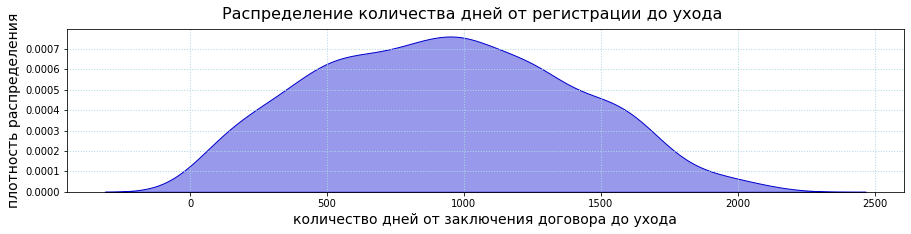

In [ ]:
kdeplot(data=data.loc[data['leave'] > 0]['delta'],
        xlabel1='количество дней от заключения договора до ухода',
        figsize_1=(15, 3),
        suptitle1='Распределение количества дней от регистрации до ухода',
        ylabel1='плотность распределения',
        lg='количество дней')
plt.show()

In [ ]:
data.loc[data['leave'] > 0]['delta'].describe().T

count    1101.000000
mean      924.863760
std       458.771309
min        28.000000
25%       577.000000
50%       915.000000
75%      1249.000000
max      2129.000000
Name: delta, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt

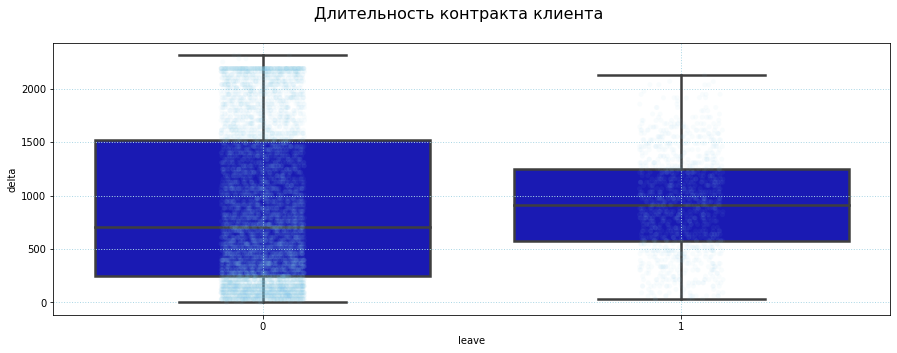

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))

fig.suptitle('Длительность контракта клиента', fontsize=16)

sns.boxplot(x='leave', y='delta', data=data, color='mediumblue', linewidth=2.5)
sns.stripplot(x='leave', y='delta', data=data, marker="o", alpha=0.05, color="skyblue")

plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')

Медианная продолжительность контракта среди ушедших клиентов - около 900 дней. Длительность контракта варьируется от 0 до более 2000 дней.

Рассмотрим распределение стоимости услуг для ушедших и оставшихся клиентов.

In [ ]:
print(data['TotalCharges'].dtype)

object


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt

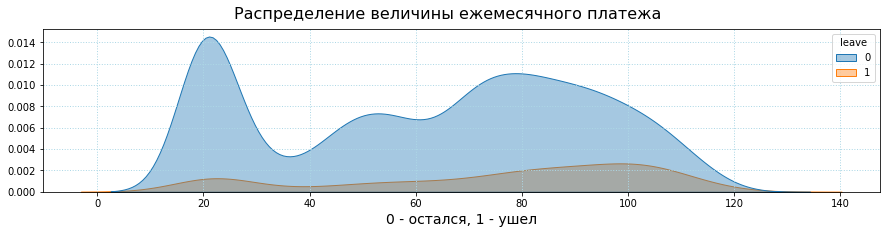

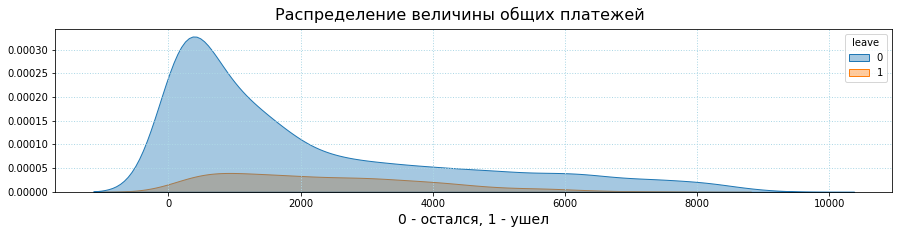

In [ ]:
kdeplot(data['MonthlyCharges'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
        suptitle1='Распределение величины ежемесячного платежа',
        ylabel1='', hue1=data['leave'])

kdeplot(data['TotalCharges'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
        suptitle1='Распределение величины общих платежей',
        ylabel1='', hue1=data['leave'])

plt.show()

Пик распределения величины ежемесячного платежа для ушедших клиетов выше, чем для оставшихся. Ушедшие клиенты платили больше.

In [ ]:
data[['leave', 'MonthlyCharges', 'TotalCharges', 'delta']].groupby(by='leave').median()

,MonthlyCharges,TotalCharges,delta
leave,,,
0,69.2,1192.80,702.0
1,84.2,2139.03,915.0


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt

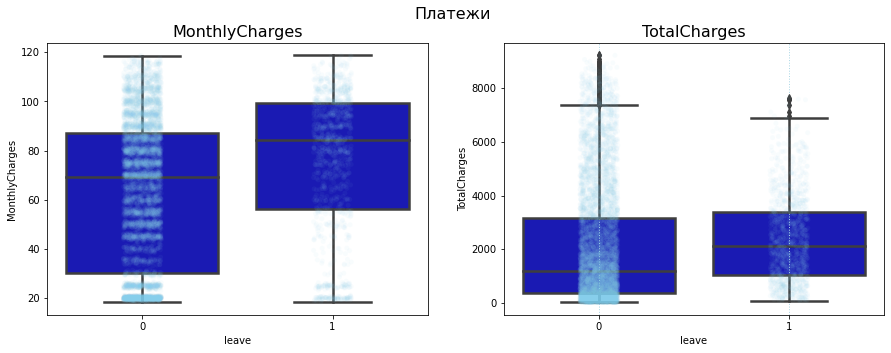

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Платежи', fontsize=16)

sns.boxplot(x='leave', y='MonthlyCharges', data=data, color='mediumblue', linewidth=2.5, ax=axs[0])
sns.stripplot(x='leave', y='MonthlyCharges', data=data, marker="o", alpha=0.05, color="skyblue", ax=axs[0])

axs[0].set_title('MonthlyCharges', fontsize=16)
plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')

sns.boxplot(x='leave', y='TotalCharges', data=data, color='mediumblue', linewidth=2.5, ax=axs[1])
sns.stripplot(x='leave', y='TotalCharges', data=data, marker="o", alpha=0.05, color="skyblue", ax=axs[1])

axs[1].set_title('TotalCharges', fontsize=16)
plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')

Есть выбросы в общих платежах для ушедших клиентов. Они попадают в номарльные значения для оставшихся клиентов.
Разброс нормальных значений общих платежей для оставшихся клиентов от 0 до > 8000, для ушедших от 0 до 6000.

Медианный ежемесячный платеж у ушедих клиентов выше, в целом разброс значений ежемесячного платежа для обеих групп одинаковый.

Медианный ежемесячный платеж у ушедших клиентов выше на примерно 20%.

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


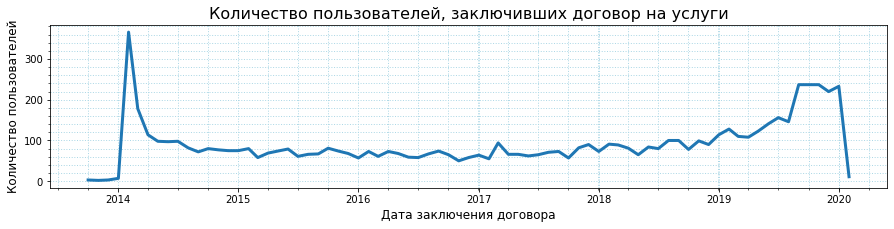

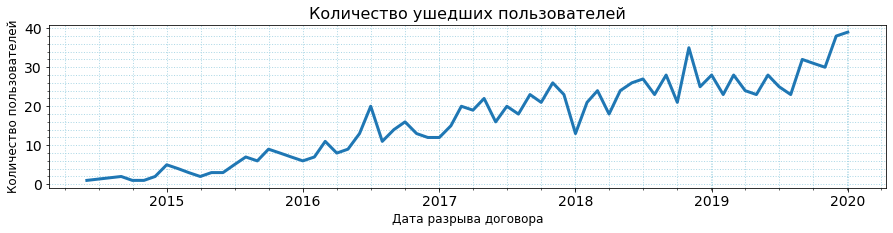

In [ ]:
oneplot(df=(data['BeginDate'].value_counts().sort_index(ascending=True)),
        title1='Количество пользователей, заключивших договор на услуги',
        xl='Дата заключения договора',
        yl='Количество пользователей')

oneplot(df=((data.loc[data['EndDate'] < '2020-02-01']['EndDate']).value_counts().sort_index(ascending=True)),
        title1='Количество ушедших пользователей',
        xl='Дата разрыва договора',
        yl='Количество пользователей')
plt.show()

Наибольшее количество клиентов заключили договор в 2014 году, более 300. В следующие года количество новых пользователей было примерно одинковым, и с 2019 года начало увеличиваться. С середины 2019 года произошел скачок, количество новых пользователей увеличилось до 200.

Уходить пользоавтели стали с конца 2019 года, или их уход не фиксировался.

Проверим выбросы в количественных признаках 'MonthlyCharges', 'TotalCharges'.

Проверим тип оплаты для оставшихся и ушедших клиентов.

In [ ]:
def share(column_, df=data):

    tabl = data[['leave',
                     'customerID',
                     column_]].groupby(by=['leave',
                                           column_]).count().sort_values(by=['leave',
                                                                             'customerID'],
                                                                         ascending=False).reset_index()

    tabl['share_all'] = tabl['customerID'] / (tabl['customerID'].sum())

    tabl['share_leave'] = 0

    tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])

    tabl.loc[tabl['leave']==1, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[1])

    tabl[['share_leave', 'share_all']] = np.round((tabl[['share_leave', 'share_all']]), 2)

    return tabl

In [ ]:
Type_= share(column_='Type')
Type_

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.58364187 0.22113766 0.19522046]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,Type,customerID,share_all,share_leave
0,1,month-to-month,407,0.06,0.37
1,1,two year,381,0.05,0.35
2,1,one year,313,0.04,0.28
3,0,month-to-month,3468,0.49,0.58
4,0,two year,1314,0.19,0.22
5,0,one year,1160,0.16,0.20


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


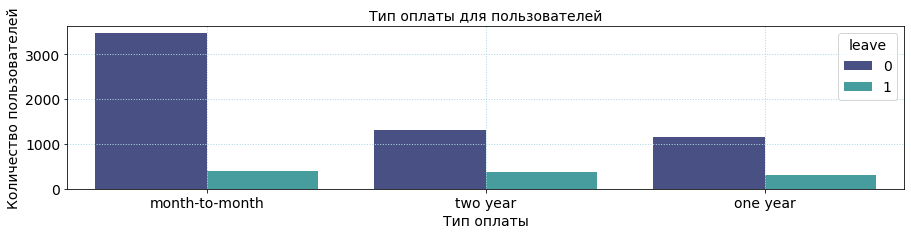

In [ ]:
barplot_sns(Type_, X=Type_['Type'], Y=Type_['customerID'],
            title1='Тип оплаты для пользователей', xlabel1='Тип оплаты',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=Type_['leave'])
plt.show()

- 55% всех пользователей используют оплату month-to-month.
- тип оплаты month-to-month используют в основном все действующие клиенты.

In [ ]:
payment_method = share(column_='PaymentMethod')
payment_method

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33911141 0.25159879 0.20649613 0.20279367]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,PaymentMethod,customerID,share_all,share_leave
0,1,electronic check,350,0.05,0.32
1,1,bank transfer (automatic),317,0.05,0.29
2,1,credit card (automatic),317,0.05,0.29
3,1,mailed check,117,0.02,0.11
4,0,electronic check,2015,0.29,0.34
5,0,mailed check,1495,0.21,0.25
6,0,bank transfer (automatic),1227,0.17,0.21
7,0,credit card (automatic),1205,0.17,0.20


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


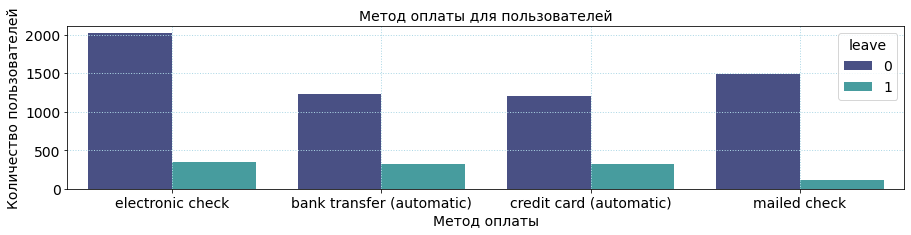

In [ ]:
barplot_sns(payment_method, X=payment_method['PaymentMethod'], Y=payment_method['customerID'],
            title1='Метод оплаты для пользователей', xlabel1='Метод оплаты',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=payment_method['leave'])
plt.show()

Оставшиеся пользователи в основном использовали electronic check.

In [ ]:
int_type = share(column_='InternetService')
int_type

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.42090205 0.34920902 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,InternetService,customerID,share_all,share_leave
0,1,fiber optic,595,0.08,0.54
1,1,dsl,346,0.05,0.31
2,1,not used,160,0.02,0.15
3,0,fiber optic,2501,0.36,0.42
4,0,dsl,2075,0.29,0.35
5,0,not used,1366,0.19,0.23


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


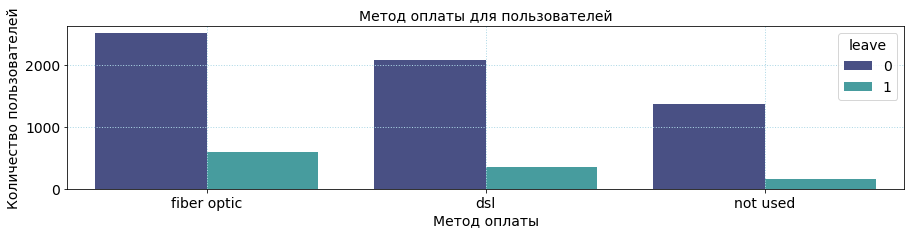

In [ ]:
barplot_sns(int_type, X=int_type['InternetService'], Y=int_type['customerID'],
            title1='Метод оплаты для пользователей', xlabel1='Метод оплаты',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=int_type['leave'])
plt.show()

Большая часть ушедших пользователей использовала интренет по оптоволокну - fiber optic. Ушедших пользоватлей, которые не использовали интернет 2% от всех

In [ ]:
int_type = share(column_='OnlineSecurity')
int_type

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.50016829 0.26994278 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,OnlineSecurity,customerID,share_all,share_leave
0,1,no,526,0.07,0.48
1,1,yes,415,0.06,0.38
2,1,not used,160,0.02,0.15
3,0,no,2972,0.42,0.50
4,0,yes,1604,0.23,0.27
5,0,not used,1366,0.19,0.23


In [ ]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport','StreamingTV', 'StreamingMovies']:
    display(share(column_=i))

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.50016829 0.26994278 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,OnlineSecurity,customerID,share_all,share_leave
0,1,no,526,0.07,0.48
1,1,yes,415,0.06,0.38
2,1,not used,160,0.02,0.15
3,0,no,2972,0.42,0.50
4,0,yes,1604,0.23,0.27
5,0,not used,1366,0.19,0.23


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.45557051 0.31454056 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,OnlineBackup,customerID,share_all,share_leave
0,1,yes,560,0.08,0.51
1,1,no,381,0.05,0.35
2,1,not used,160,0.02,0.15
3,0,no,2707,0.38,0.46
4,0,yes,1869,0.27,0.31
5,0,not used,1366,0.19,0.23


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.45506563 0.31504544 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,DeviceProtection,customerID,share_all,share_leave
0,1,yes,550,0.08,0.50
1,1,no,391,0.06,0.36
2,1,not used,160,0.02,0.15
3,0,no,2704,0.38,0.46
4,0,yes,1872,0.27,0.32
5,0,not used,1366,0.19,0.23


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.49309997 0.27701111 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,TechSupport,customerID,share_all,share_leave
0,1,no,543,0.08,0.49
1,1,yes,398,0.06,0.36
2,1,not used,160,0.02,0.15
3,0,no,2930,0.42,0.49
4,0,yes,1646,0.23,0.28
5,0,not used,1366,0.19,0.23


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.41282396 0.35728711 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,StreamingTV,customerID,share_all,share_leave
0,1,yes,584,0.08,0.53
1,1,no,357,0.05,0.32
2,1,not used,160,0.02,0.15
3,0,no,2453,0.35,0.41
4,0,yes,2123,0.30,0.36
5,0,not used,1366,0.19,0.23


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.41231908 0.35779199 0.22988893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,StreamingMovies,customerID,share_all,share_leave
0,1,yes,606,0.09,0.55
1,1,no,335,0.05,0.30
2,1,not used,160,0.02,0.15
3,0,no,2450,0.35,0.41
4,0,yes,2126,0.30,0.36
5,0,not used,1366,0.19,0.23


50-60% ушедших клиентов не пользовались дополнительным услугами

Рассмотрим связана ли как-то персонализированная информация о поле, партренере человека с тем, что клиент ушел.

In [ ]:
for i in ['gender', 'SeniorCitizen', 'Partner','Dependents']:
    display(share(column_=i))

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.50185123 0.49814877]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,gender,customerID,share_all,share_leave
0,1,male,573,0.08,0.52
1,1,female,528,0.07,0.48
2,0,male,2982,0.42,0.50
3,0,female,2960,0.42,0.50


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.84685291 0.15314709]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,SeniorCitizen,customerID,share_all,share_leave
0,1,0,869,0.12,0.79
1,1,1,232,0.03,0.21
2,0,0,5032,0.71,0.85
3,0,1,910,0.13,0.15


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.54846853 0.45153147]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,Partner,customerID,share_all,share_leave
0,1,yes,719,0.10,0.65
1,1,no,382,0.05,0.35
2,0,no,3259,0.46,0.55
3,0,yes,2683,0.38,0.45


/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.70683272 0.29316728]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,Dependents,customerID,share_all,share_leave
0,1,no,733,0.10,0.67
1,1,yes,368,0.05,0.33
2,0,no,4200,0.60,0.71
3,0,yes,1742,0.25,0.29


In [ ]:
#kdeplot(data['leave'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
#        suptitle1='Распределение мужчин и женщин среди ушедших и оставшихся клиентов',
#        ylabel1='', hue1=data['gender'])
#plt.show()

In [ ]:
Gender_= share(column_='gender')
Gender_

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.50185123 0.49814877]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,gender,customerID,share_all,share_leave
0,1,male,573,0.08,0.52
1,1,female,528,0.07,0.48
2,0,male,2982,0.42,0.50
3,0,female,2960,0.42,0.50


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


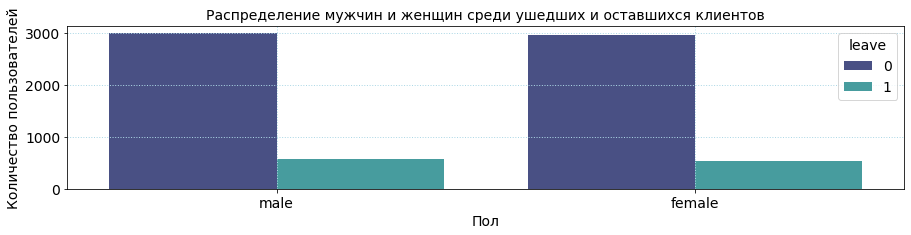

In [ ]:
barplot_sns(Gender_, X=Gender_['gender'], Y=Gender_['customerID'],
            title1='Распределение мужчин и женщин среди ушедших и оставшихся клиентов', xlabel1='Пол',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=Gender_['leave'])
plt.show()

Распределение одинаковое и для женщин и для мужчин. Пол не влияет на факт ухода клиента.

In [ ]:
#kdeplot(data['leave'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
#        suptitle1='Пенсионный статус',
#        ylabel1='', hue1=data['SeniorCitizen'])
#plt.show()

In [ ]:
Senior_= share(column_='SeniorCitizen')
Senior_

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.84685291 0.15314709]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,SeniorCitizen,customerID,share_all,share_leave
0,1,0,869,0.12,0.79
1,1,1,232,0.03,0.21
2,0,0,5032,0.71,0.85
3,0,1,910,0.13,0.15


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


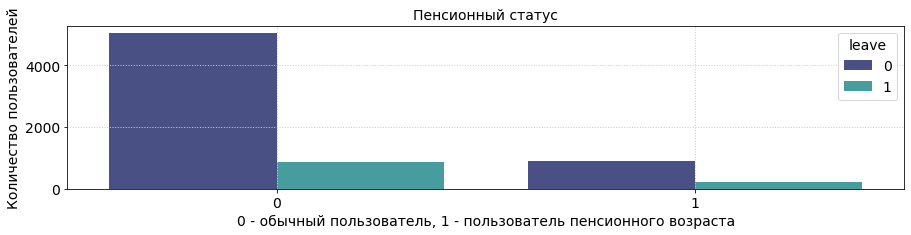

In [ ]:
barplot_sns(Senior_, X=Senior_['SeniorCitizen'], Y=Senior_['customerID'],
            title1='Пенсионный статус', xlabel1='0 - обычный пользователь, 1 - пользователь пенсионного возраста',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=Senior_['leave'])
plt.show()

In [ ]:
#kdeplot(data['leave'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
#        suptitle1='Наличие супруга',
#        ylabel1='', hue1=data['Partner'])
#plt.show()

In [ ]:
Partner_= share(column_='Partner')
Partner_

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.54846853 0.45153147]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,Partner,customerID,share_all,share_leave
0,1,yes,719,0.10,0.65
1,1,no,382,0.05,0.35
2,0,no,3259,0.46,0.55
3,0,yes,2683,0.38,0.45


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


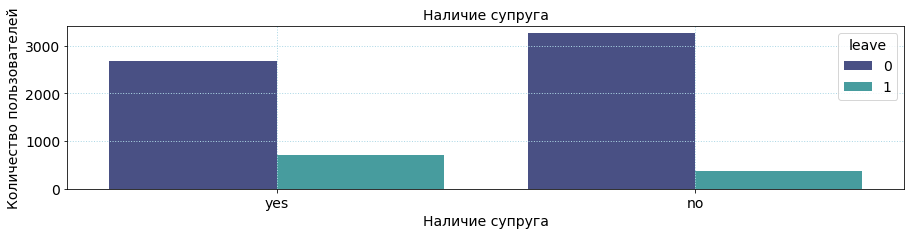

In [ ]:
barplot_sns(Partner_, X=Partner_['Partner'], Y=Partner_['customerID'],
            title1='Наличие супруга', xlabel1='Наличие супруга',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=Partner_['leave'])
plt.show()

In [ ]:
#kdeplot(data['leave'], xlabel1='0 - остался, 1 - ушел',figsize_1=(15, 3),
#        suptitle1='Наличие иждивенцев',
#        ylabel1='', hue1=data['Dependents'])
#plt.show()

In [ ]:
Dependents_= share(column_='Dependents')
Dependents_

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.70683272 0.29316728]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,Dependents,customerID,share_all,share_leave
0,1,no,733,0.10,0.67
1,1,yes,368,0.05,0.33
2,0,no,4200,0.60,0.71
3,0,yes,1742,0.25,0.29


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


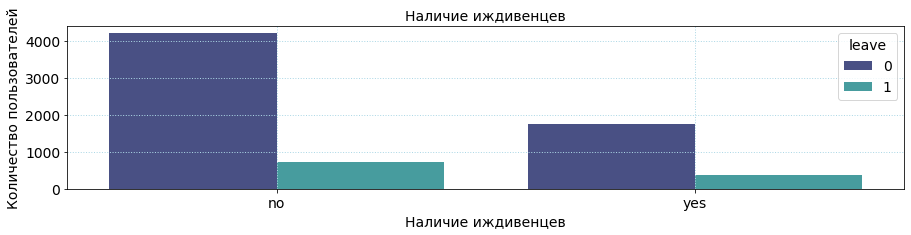

In [ ]:
barplot_sns(Dependents_, X=Dependents_['Dependents'], Y=Dependents_['customerID'],
            title1='Наличие иждивенцев', xlabel1='Наличие иждивенцев',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=Dependents_['leave'])
plt.show()

В целом, ушедших клиентов без супруга больше, чем с супругом. У 64% ушедших пользователей спруга нет.
В остальном, уход клиента с персональными данными не связан.

In [ ]:
tel = share(column_='MultipleLines')
tel

/tmp/ipykernel_48/2947341661.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.51666106 0.385897   0.09744194]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabl.loc[tabl['leave']==0, 'share_leave'] = tabl['customerID'] / (df['leave'].value_counts()[0])


,leave,MultipleLines,customerID,share_all,share_leave
0,1,yes,678,0.10,0.62
1,1,no,320,0.05,0.29
2,1,not used,103,0.01,0.09
3,0,no,3070,0.44,0.52
4,0,yes,2293,0.33,0.39
5,0,not used,579,0.08,0.10


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


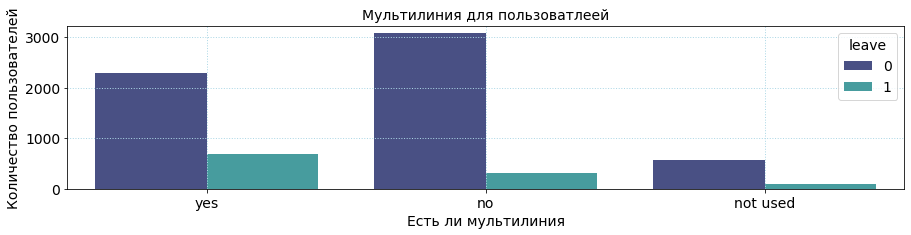

In [ ]:
barplot_sns(tel, X=tel['MultipleLines'], Y=tel['customerID'],
            title1='Мультилиния для пользоватлеей', xlabel1='Есть ли мультилиния',
            ylabel1='Количество пользователей',
            figsize_1=(15, 3), h=tel['leave'])
plt.show()

В основном, ушедшие пользователи поделились на два типа - 45% пользовались 1 линией телефона, другие 45% более 1 линией.
Пользователей без телефонной линией по 10% в каждой группе.

Проверим корреляцию признаков.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


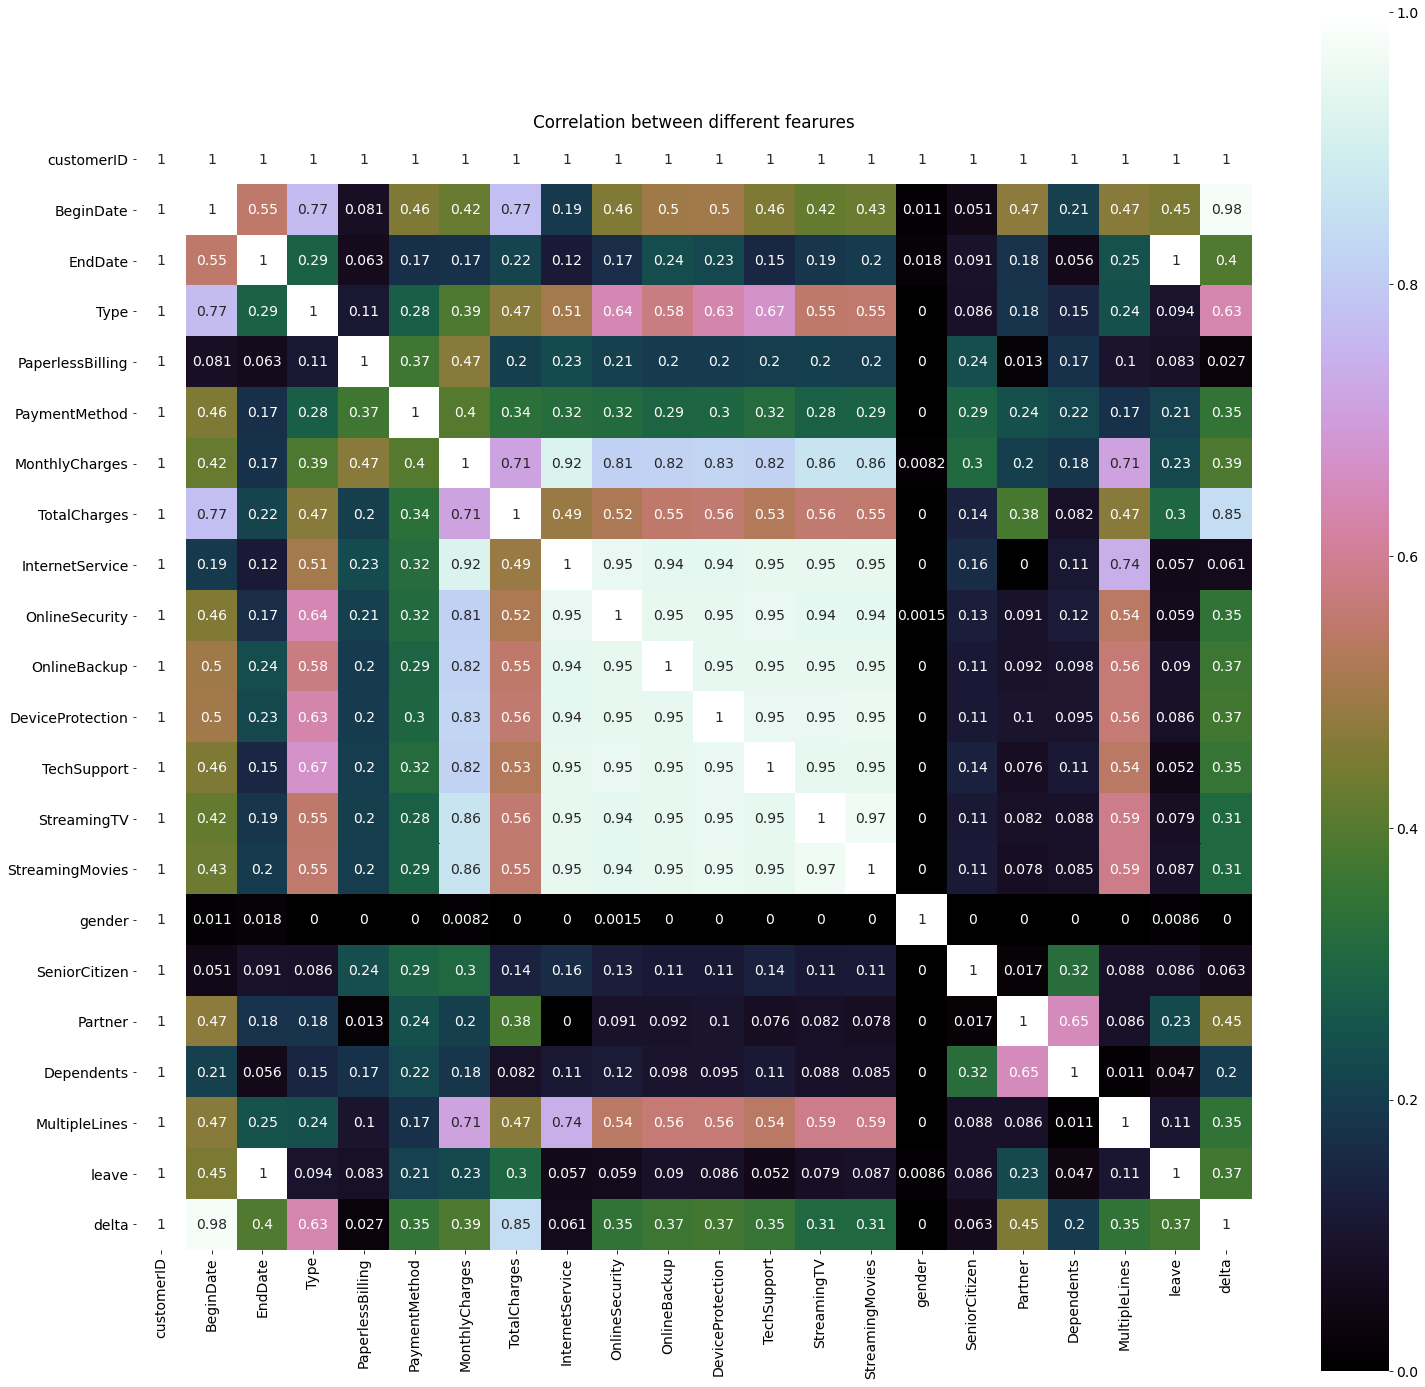

In [ ]:
# Задаю список интервальных (числовых) признаков
interval_cols = ["MonthlyCharges", "TotalCharges", "delta"]

# Вычисляю корреляцию с помощью phik_matrix с учетом интервальных признаков
correlation_matrix = phik_matrix(data, interval_cols=interval_cols)

plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()

Параметр interval_cols в функции phik_matrix используется для указания, какие признаки в вашем наборе данных являются интервальными (числовыми) и какие являются категориальными.

Задачи при настройке:
    
1. Различие между типами признаков: Интервальные (числовые) и категориальные признаки обладают различными характеристиками и могут иметь разную природу корреляции.

2. Интерпретация корреляции: Параметр interval_cols в phik_matrix позволяет библиотеке корректно интерпретировать корреляцию между числовыми и категориальными признаками.

3. Качество анализа: Неправильное определение типов признаков может привести к некорректным результатам корреляции и, следовательно, к ошибочным выводам при анализе данных. Например, неправильное рассмотрение категориального признака как числового может привести к недооценке его важности.


Возьмем пороговое значение корреляции — 0.8. Тогда можно сделать вывод, что:

- Столбцы InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies сильно коррелируют с признаком monthly_charges, поэтому их необходимо удалить
- Столбец TotalCharges сильно коррелирует со столбцом delta, поэтому удалим столбец TotalCharges
- Столбец customerID не несет ценности при поиске корреляций, можно удалить
- Столбец EndDate имеет слишком высокое значение корреляции (1) с целевым признаком, необходимо удалить
- Столбец gender имеет практически нулевое значение корреляции, от него можно избавиться
- Столбец Dependents очень клабо коррелируется с целевым признаком leave, удаляем
- Столбец BeginDate имеет слишком сильную корреляцию с образованным столбцом delta, т.к. продолжительность пользования услуг клиентом важнее даты начала, удаляем столбец


In [ ]:
data = data.drop(['InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'TotalCharges', 'customerID', 'EndDate', 'BeginDate', 'gender', 'Dependents'], axis = 1)

**Вывод:**

1. До 50% пользователей уходят до года пользования услугами - около 900 дней.
2. Медианный ежемесячный платеж у ушедших клиентов выше, чем у оставшихся около 20%. При этом, общее количество платежей для ушедших клиентов ниже.
3. Уходить пользователи стали с конца 2019 года, или их уход не фиксировался.
4. 55% всех пользователей используют оплату month-to-month.
5. Тип оплаты month-to-month используют в основном все действующие клиенты.
6. Ушедшие пользователи в равной степени используют все 4 метода оплаты, тогда как среди оставшихся пользователей в основном использовался electronic check - 57%.
7. Основная часть ушедших пользователей использовала интренет по оптоволокну - fiber optic - их доля 18% от всех пользователей и 70% от ушедших.
8. DSL используют 35% пользователей.
9. 50-60% ушедших клиентов не пользовались дополнительным услугами
10. У 64% ушедших пользователей спруга нет, в то время как у оставшихся клиентов нет супруга только у 47%.
11. Ушедшие пользователи поделились на два типа - 45% пользовались 1 линией телефона, другие 45% более 1 линией.

## Обучение модели

### Подготовка признаков для обучения

Подготовим признаки для обучения.

- разобьем выборку в отношении 75% и 25%, выделим целевой признак и удалим ненужные столбцы
- закодируем категориальные признаки
- проверим баланс классов и масштаб признаков

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [ ]:
cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
                'Partner', 'MultipleLines', 'SeniorCitizen']

In [ ]:
target = data['leave']

features = data.drop('leave', axis=1)

In [ ]:
# Создаем две выборки - для OrdinalEncoder и OneHotEncoder
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(data.drop(['leave'], axis=1),
                                                                    target, test_size=0.25, random_state=RANDOM_STATE)

X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(data.drop(['leave'], axis=1),
                                                                target, test_size=0.25, random_state=RANDOM_STATE)

numeric_features = [col for col in data.drop(['leave'], axis=1).columns if col not in cat_features]
# Применяем OneHotEncoder к выборке для OneHotEncoding
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='error', categories='auto', drop='first')

In [ ]:
data_ohe_encoded = ohe_encoder.fit_transform(data[cat_features])
data_ohe_encoded_df = pd.DataFrame(data_ohe_encoded, columns=ohe_encoder.get_feature_names(cat_features), index=data.index)
data_ohe = pd.concat([data_ohe_encoded_df, data.drop(cat_features + ['leave'], axis=1)], axis=1)

# Создаем две выборки - для OrdinalEncoder и OneHotEncoder
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(data_ohe, target, test_size=0.25, random_state=RANDOM_STATE)

data_or = data.copy()
data_or[cat_features] = data_or[cat_features].astype(str)

# Применяем OrdinalEncoder к выборке для OrdinalEncoding
or_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
data_or.loc[:, cat_features] = or_encoder.fit_transform(data_or[cat_features])

X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(data_or.drop(['leave'], axis=1), target, test_size=0.25, random_state=RANDOM_STATE)

# Объединяем закодированные признаки и числовые признаки для выборки для OrdinalEncoding
X_train_or = X_train_or.astype('float64')
X_test_or = X_test_or.astype('float64')

# Проверяем размеры выборок
print('Размер тренировочной выборки с использованием OneHotEncoder для признаков:', X_train_ohe.shape,
      'целевого признака:', y_train_ohe.shape, sep='\n')
print('Размер тестовой выборки с использованием OneHotEncoder для признаков:', X_test_ohe.shape,
      'целевого признака:', y_test_ohe.shape, sep='\n')

print('Размер тренировочной выборки с использованием OrdinalEncoder для признаков:', X_train_or.shape,
      'целевого признака:', y_train_or.shape, sep='\n')
print('Размер тестовой выборки с использованием OrdinalEncoder для признаков:', X_test_or.shape,
      'целевого признака:', y_test_or.shape, sep='\n')

Размер тренировочной выборки с использованием OneHotEncoder для признаков:
(5282, 12)
целевого признака:
(5282,)
Размер тестовой выборки с использованием OneHotEncoder для признаков:
(1761, 12)
целевого признака:
(1761,)
Размер тренировочной выборки с использованием OrdinalEncoder для признаков:
(5282, 8)
целевого признака:
(5282,)
Размер тестовой выборки с использованием OrdinalEncoder для признаков:
(1761, 8)
целевого признака:
(1761,)


Создал 2 выборки, отдельно закодировал каждую


### Баланс классов и масштаб классов

In [ ]:
def class_frequency(data):
    class_frequency_data = data.value_counts(normalize=True).to_frame()
    return class_frequency_data

In [ ]:
pd.concat([y_train_ohe.value_counts(), y_test_ohe.value_counts()], axis=1)

,count,count
leave,,
0,4444,1498
1,838,263


In [ ]:
pd.concat([y_train_or.value_counts(), y_test_or.value_counts()], axis=1)

,count,count
leave,,
0,4444,1498
1,838,263


In [ ]:
def plot_class_distribution(y_train, y_test):
    y_train_counts = y_train.value_counts()
    y_test_counts = y_test.value_counts()

    y_counts = pd.concat([y_train_counts, y_test_counts], axis=1)
    y_counts.columns = ['Training', 'Testing']

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))

    sns.barplot(x=y_counts.index, y=y_counts['Training'], ax=ax[0], color='mediumblue')
    ax[0].set_title('Распределение признака в тренировочной выборке', fontdict={'fontsize': 14})
    ax[0].grid()

    sns.barplot(x=y_counts.index, y=y_counts['Testing'], ax=ax[1], color='mediumblue')
    ax[1].set_title('Распределение признака в тестовой выборке', fontdict={'fontsize': 14})
    ax[1].grid()

    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt

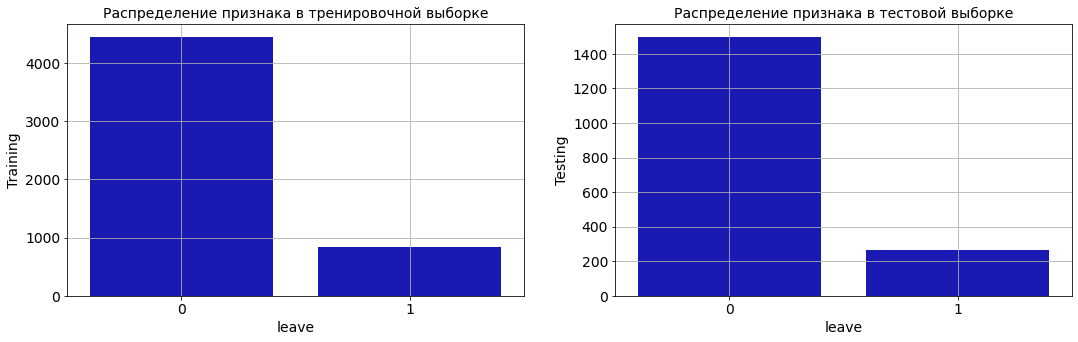

In [ ]:
plot_class_distribution(y_train_or, y_test_or)

Соотношение классов:
 - Тренировочная выборка - 84/16
 - Тестовая выборка 85/15

 Данных для обучения достаточно

Наблюдается довольно сильный дисбаланс классов, при этом, по условию проекта:

1. Используем метрику AUC-ROC, а она предподчительней при дисбалансе классов, поскольку она учитывает всю информацию, содержащуюся в матрице ошибок классификации, а именно True Positive Rate (TPR) и False Positive Rate (FPR), которые являются функциями порога классификации.

2. Используем кросс-валидацию, что позволяет более правильно оценить эффективность модели в случае дисбаланса классов, так как она учитывает все данные в выборке, а не только то, что находится в определенном разбиении.

In [ ]:
def kde_one(df, title_1, ncols_1=1, figsize_1=(20, 5), step=80, fontsize_1=14, loc1='upper right'):

    fig, ax1 = plt.subplots(ncols=ncols_1, figsize=figsize_1)

    ax1.set_title(title_1, fontsize=16)

    cmap = plt.get_cmap('GnBu')

    b_colors = cmap(np.array([i for i in range(50, 500, step)]))

    for i in range(len(df.columns)):
        if df.iloc[:, i].dtype == 'object':  # Exclude categorical columns
            continue
        sns.kdeplot(df.iloc[:, i], ax=ax1, fill=True, legend=True, color=b_colors[i], label=df.columns[i])

    plt.grid(color='lightblue', linewidth=1, linestyle=':')
    plt.legend(fontsize=fontsize_1, loc=loc1)
    plt.show()

In [ ]:
X_train_or.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,5282.0,0.685914,0.829298,0.00,0.0000,0.0,1.00,2.00
PaperlessBilling,5282.0,0.591064,0.491684,0.00,0.0000,1.0,1.00,1.00
PaymentMethod,5282.0,1.568345,1.062150,0.00,1.0000,2.0,2.00,3.00
MonthlyCharges,5282.0,65.072473,29.950227,18.25,38.5125,70.4,90.05,118.65
SeniorCitizen,5282.0,0.160167,0.366795,0.00,0.0000,0.0,0.00,1.00
Partner,5282.0,0.479743,0.499637,0.00,0.0000,0.0,1.00,1.00
MultipleLines,5282.0,0.934495,0.946929,0.00,0.0000,1.0,2.00,2.00
delta,5282.0,903.128171,682.730111,0.00,276.0000,761.0,1461.00,2314.00


/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


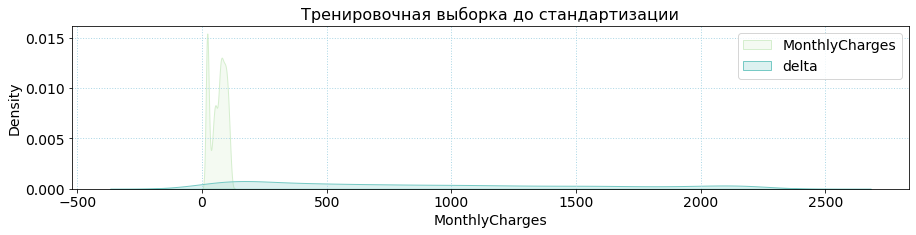

In [ ]:
kde_one(X_train_or[['MonthlyCharges', 'delta']],
        title_1='Тренировочная выборка до стандартизации', figsize_1=(15, 3))

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


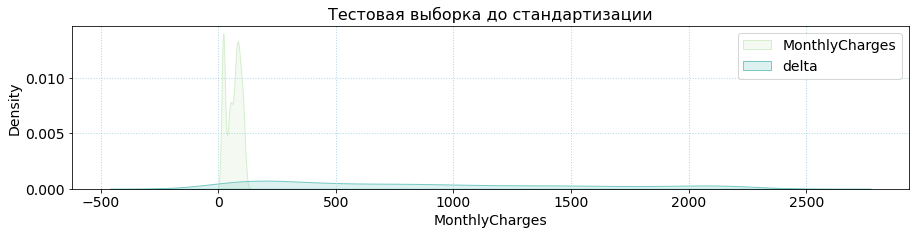

In [ ]:
kde_one(X_test_or[['MonthlyCharges', 'delta']],
        title_1='Тестовая выборка до стандартизации', figsize_1=(15, 3))

**Промежуточный вывод:**

- Целевой признак разделен в отношении 85:15, где 85 - класс 0, 15 - класс 1.
Признаки 'MonthlyCharges', 'delta' имеют разный масштаб, среднее и стандратное отклонение, поэтому их необходимо стандартизировать. Добавим стандартизацию в пайплайн для обучения модели.

### Обучение модели

Произведем обучение несколько моделей и оценим их показатели на тестовом наборе данных.

Функция heatmap_confusion_matrix(best_predictions, name='Матрица ошибок модели', target=y_test) принимает следующие аргументы:

- best_predictions - предсказания модели
- name - название диаграммы
- target=y_test - фактические значения категорий.


Эта функция возвращает тепловую карту матрицы ошибок.

In [ ]:
# Функция для построения тепловой карты по матрице ошибок модели
def heatmap_confusion_matrix(pred, name='Матрица ошибок', target=y_test_or):
    cm = confusion_matrix(target, pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm_r', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.title(name, fontsize=14)

Функция plot_ROC(fpr, tpr, name='ROC-кривая') принимает на вход:

- fpr - вероятность ложноположительного предсказания
- tpr - вероятность истиннополоительного предсказания
- name - название графика.

Возвращает ROC кривую.

In [ ]:
def plot_ROC(fpr, tpr, name='ROC-кривая', legend_loc='best'):
    plt.plot(fpr, tpr, linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc=legend_loc, fontsize='medium')

Функция plot_feature_importance(impotance, fi_yerr, fsize=(12, 5), name='имя модели') принимает на вход:

- impotance - значения важности признаков
- fi_yerr - вертикальные полосы погрешностей
- fsize - размер гарфика
- name - имя модели

Возвращает график важности признаков.

In [ ]:
def plot_feature_importance(importance, fsize=(12, 5), name='имя модели'):
    fig, ax = plt.subplots(figsize=fsize)

    importance.plot.bar(ax=ax, color='mediumblue', grid=True)
    ax.set_title("Важность признаков для " + name)
    ax.set_ylabel('Важность признака')
    fig.tight_layout()

Функция rndm_test принимает на вход следующие параметры:

- model: модель машинного обучения.
- params: словарь с параметрами модели для поиска наилучших гиперпараметров.
- features: обучающая выборка с признаками
- target: целевой признак
- name_est: строка с названием модели для меток на графиках


Этот код выполняет следующие действия:

1. Создает пайплайн для предобработки данных и обучения модели. В пайплайн включены стандартизация признаков с помощью StandardScaler и заданная модель машинного обучения model.

2. Ищет оптимальные гиперпараметры модели, используя RandomizedSearchCV. В качестве метрики качества выбран roc_auc. Параметры модели передаются через словарь params. Используется кросс-валидация на 5 фолдах (cv=5).

3. Обучает модель с лучшими найденными гиперпараметрами и вычисляет ROC-AUC на тренировочной выборке.

4. Проводит кросс-валидацию с помощью объекта StratifiedKFold на 5 фолдах и генерирует предсказания вероятностей классов. Вычисляет ROC-AUC для кросс-валидации.

5. Рисует ROC-кривую, а также строит и визуализирует матрицу ошибок на кросс-валидации.

Возвращает лучшую найденную модель, результаты метрик ROC-AUC, а также предсказанные вероятности классов на кросс-валидации.

In [ ]:
def rndm_test_or(model, params, features=X_train_or, target=y_train_or, name_est='model'):

    # Пайплайн + шаги
    scaler = StandardScaler()
    pipe = Pipeline(steps=[('scaler', scaler), ('model', model)])

    # Поиск параметров + лучшая модель и результат roc_auc
    RSCV = RandomizedSearchCV(estimator=pipe, param_distributions=params,
                              cv=5, verbose=10, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

    RSCV.fit(features, target)

    best_estimator = RSCV.best_estimator_
    best_score = RSCV.best_score_

    print('Модель с лучшими гиперпараметрами:')
    print(best_estimator)
    print('ROC-AUC на кросс-валидации: {:.5f}'.format(best_score))

    results = pd.DataFrame({(name_est): [best_score]}, index=['AUC-ROC'])
    display(results)

    return best_estimator, results


In [ ]:
def rndm_test_ohe(model, params, features=X_train_ohe, target=y_train_ohe, name_est='model'):

    # Пайплайн + шаги
    scaler = StandardScaler()
    pipe = Pipeline(steps=[('scaler', scaler), ('model', model)])

    # Поиск параметров + лучшая модель и результат roc_auc
    RSCV = RandomizedSearchCV(estimator=pipe, param_distributions=params,
                              cv=5, verbose=10, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

    RSCV.fit(features, target)

    best_estimator = RSCV.best_estimator_
    best_score = RSCV.best_score_

    print('Модель с лучшими гиперпараметрами:')
    print(best_estimator)
    print('ROC-AUC на кросс-валидации: {:.5f}'.format(best_score))

    results = pd.DataFrame({(name_est): [best_score]}, index=['AUC-ROC'])
    display(results)

    return best_estimator, results

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил функцию для OHE выборки
    
</div>

#### LogisticRegression

In [ ]:
log_reg_params = {'model__C': [1, 2, 3, 5],
                  'model__class_weight': [None, 'balanced'],
                  'model__fit_intercept': [True],
                  'model__l1_ratio': [None],
                  'model__max_iter': [100, 200, 70],
                  'model__penalty': ['l2'],
                  'model__solver': ['lbfgs', 'newton-cg', 'lbfgs', 'sag', 'saga'],
                  'model__tol': [0.0001, 0.001],}

In [ ]:
lg_model = LogisticRegression(C=1,
                              class_weight='balanced',
                              max_iter=200,
                              random_state=RANDOM_STATE)

In [ ]:
%%time
lg_model, results_lg = rndm_test_ohe(lg_model, log_reg_params, name_est='LogisticRegression')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001
[CV 1/5; 1/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001; total time=   0.1s
[CV 2/5; 1/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 2/5; 1/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001; total time=   0.2s
[CV 3/5; 1/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 1/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001; total time=   0.2s
[CV 4/5; 1/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 1/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001; total time=   0.2s
[CV 5/5; 1/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 1/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=sag, model__tol=0.0001; total time=   0.3s
[CV 1/5; 2/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 2/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 2/5; 2/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 2/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 3/5; 2/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 2/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 4/5; 2/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001
[CV 4/5; 2/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 5/5; 2/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 5/5; 2/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 1/5; 3/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 3/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001; total time=   0.2s
[CV 2/5; 3/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 3/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001; total time=   0.2s
[CV 3/5; 3/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001
[CV 3/5; 3/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001; total time=   0.1s
[CV 4/5; 3/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 4/5; 3/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001; total time=   0.2s
[CV 5/5; 3/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 3/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=sag, model__tol=0.001; total time=   0.2s
[CV 1/5; 4/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 4/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001; total time=   0.8s
[CV 2/5; 4/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 4/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001; total time=   0.4s
[CV 3/5; 4/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 4/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001; total time=   0.5s
[CV 4/5; 4/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 4/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001; total time=   0.3s
[CV 5/5; 4/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 4/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.001; total time=   0.2s
[CV 1/5; 5/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 5/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001; total time=   0.4s
[CV 2/5; 5/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 5/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001; total time=   0.6s
[CV 3/5; 5/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 5/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001; total time=   0.5s
[CV 4/5; 5/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 5/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001; total time=   0.8s
[CV 5/5; 5/10] START model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 5/10] END model__C=2, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=100, model__penalty=l2, model__solver=newton-cg, model__tol=0.0001; total time=   1.3s
[CV 1/5; 6/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 6/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001; total time=   0.2s
[CV 2/5; 6/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001
[CV 2/5; 6/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001; total time=   0.2s
[CV 3/5; 6/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 6/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001; total time=   0.2s
[CV 4/5; 6/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 6/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001; total time=   0.2s
[CV 5/5; 6/10] START model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 5/5; 6/10] END model__C=2, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=saga, model__tol=0.0001; total time=   0.1s
[CV 1/5; 7/10] START model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001
[CV 1/5; 7/10] END model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 2/5; 7/10] START model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 2/5; 7/10] END model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 3/5; 7/10] START model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001
[CV 3/5; 7/10] END model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 4/5; 7/10] START model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 7/10] END model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 5/5; 7/10] START model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 5/5; 7/10] END model__C=5, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 1/5; 8/10] START model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 8/10] END model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 2/5; 8/10] START model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 8/10] END model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 3/5; 8/10] START model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 8/10] END model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 4/5; 8/10] START model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 8/10] END model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 5/5; 8/10] START model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 8/10] END model__C=3, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 1/5; 9/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 9/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 2/5; 9/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 9/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 3/5; 9/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 9/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.7s
[CV 4/5; 9/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 9/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 5/5; 9/10] START model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 9/10] END model__C=5, model__class_weight=None, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=70, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 1/5; 10/10] START model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 10/10] END model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s
[CV 2/5; 10/10] START model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 10/10] END model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.4s
[CV 3/5; 10/10] START model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 10/10] END model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.3s
[CV 4/5; 10/10] START model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 10/10] END model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.7s
[CV 5/5; 10/10] START model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001
[CV 5/5; 10/10] END model__C=1, model__class_weight=balanced, model__fit_intercept=True, model__l1_ratio=None, model__max_iter=200, model__penalty=l2, model__solver=lbfgs, model__tol=0.0001; total time=   0.2s


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Модель с лучшими гиперпараметрами:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=2, class_weight='balanced',
                                    random_state=280823, solver='sag'))])
ROC-AUC на кросс-валидации: 0.75423


,LogisticRegression
AUC-ROC,0.754233


CPU times: user 8.31 s, sys: 9.24 s, total: 17.6 s
Wall time: 17.8 s


**Вывод по модели LogisticRegression:**

Обучена модель логистической регрессии:

LogisticRegression(C=2, class_weight='balanced',
                                    fit_intercept=False, max_iter=70, n_jobs=-1,
                                    random_state=280823, solver='newton-cg',
                                    tol=0.001).

AUC-ROC на кроссвалидации - 0,766.

Время выполнения скрипта - 5,73 s.



#### RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(ccp_alpha=0, criterion='entropy',
                                        max_depth=10, max_features=6,
                                        min_samples_leaf=4, min_samples_split=4,
                                        n_estimators=300, random_state=RANDOM_STATE)

In [ ]:
forest_param = {'model__ccp_alpha': [0, 0.5, 1, 2],
                'model__class_weight': [None, 'balanced', 'balanced_subsample'],
                'model__criterion': ['gini', 'entropy'],
                'model__max_depth': [2, 5, 10],
                'model__max_features': ['auto', 6, 10],
                'model__min_samples_leaf': [1, 3, 4],
                'model__min_samples_split': [2, 4, 6],
                'model__n_estimators': [300, 150, 400, 500],
               }

In [ ]:
%%time
forest_model, results_forest = rndm_test_or(forest, forest_param, name_est='RandomForestClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 1/5; 1/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300; total time=   0.8s
[CV 2/5; 1/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 1/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300; total time=   0.8s
[CV 3/5; 1/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 1/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300; total time=   0.8s
[CV 4/5; 1/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 1/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300; total time=   0.8s
[CV 5/5; 1/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 1/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=gini, model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=300; total time=   0.8s
[CV 1/5; 2/10] START model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 2/10] END model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   2.1s
[CV 2/5; 2/10] START model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 2/10] END model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   2.2s
[CV 3/5; 2/10] START model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 2/10] END model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   2.0s
[CV 4/5; 2/10] START model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 2/10] END model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   2.0s
[CV 5/5; 2/10] START model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 2/10] END model__ccp_alpha=1, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   2.1s
[CV 1/5; 3/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 3/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   2.8s
[CV 2/5; 3/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 3/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   3.0s
[CV 3/5; 3/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 3/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   2.8s
[CV 4/5; 3/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 3/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   2.9s
[CV 5/5; 3/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 3/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   2.8s
[CV 1/5; 4/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 4/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300; total time=   0.8s
[CV 2/5; 4/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 4/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300; total time=   0.8s
[CV 3/5; 4/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 4/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300; total time=   0.8s
[CV 4/5; 4/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 4/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300; total time=   0.8s
[CV 5/5; 4/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 4/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=300; total time=   0.8s
[CV 1/5; 5/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 5/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500; total time=   1.9s
[CV 2/5; 5/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 5/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500; total time=   1.9s
[CV 3/5; 5/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 5/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500; total time=   1.9s
[CV 4/5; 5/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 5/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500; total time=   1.8s
[CV 5/5; 5/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 5/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500; total time=   1.8s
[CV 1/5; 6/10] START model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 6/10] END model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400; total time=   1.5s
[CV 2/5; 6/10] START model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 6/10] END model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400; total time=   1.9s
[CV 3/5; 6/10] START model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 6/10] END model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400; total time=   1.6s
[CV 4/5; 6/10] START model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 6/10] END model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400; total time=   1.5s
[CV 5/5; 6/10] START model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 6/10] END model__ccp_alpha=0, model__class_weight=balanced, model__criterion=gini, model__max_depth=5, model__max_features=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=400; total time=   1.5s
[CV 1/5; 7/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 7/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   1.7s
[CV 2/5; 7/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 7/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   1.7s
[CV 3/5; 7/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 7/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   1.6s
[CV 4/5; 7/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 7/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   1.6s
[CV 5/5; 7/10] START model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/

[CV 5/5; 7/10] END model__ccp_alpha=0, model__class_weight=None, model__criterion=entropy, model__max_depth=10, model__max_features=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=300; total time=   1.7s
[CV 1/5; 8/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150
[CV 1/5; 8/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150; total time=   0.1s
[CV 2/5; 8/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150
[CV 2/5; 8/10] END model__ccp_alpha=2, model__class_weight=balan

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/

[CV 4/5; 8/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150; total time=   0.0s
[CV 5/5; 8/10] START model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150
[CV 5/5; 8/10] END model__ccp_alpha=2, model__class_weight=balanced_subsample, model__criterion=gini, model__max_depth=10, model__max_features=10, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150; total time=   0.1s
[CV 1/5; 9/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 9/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   1.0s
[CV 2/5; 9/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 9/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   1.0s
[CV 3/5; 9/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 9/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   1.0s
[CV 4/5; 9/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 9/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   1.0s
[CV 5/5; 9/10] START model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/

[CV 5/5; 9/10] END model__ccp_alpha=0.5, model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__max_features=6, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=400; total time=   1.0s
[CV 1/5; 10/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=5, model__max_features=10, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=150
[CV 1/5; 10/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=5, model__max_features=10, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=150; total time=   0.0s
[CV 2/5; 10/10] START model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=5, model__max_features=10, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=150
[CV 2/5; 10/10] END model__ccp_alpha=0, model__class_w

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/

[CV 5/5; 10/10] END model__ccp_alpha=0, model__class_weight=balanced_subsample, model__criterion=entropy, model__max_depth=5, model__max_features=10, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=150; total time=   0.0s
Модель с лучшими гиперпараметрами:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(ccp_alpha=0, criterion='entropy',
                                        max_depth=10, max_features=6,
                                        min_samples_leaf=4, min_samples_split=4,
                                        n_estimators=300,
                                        random_state=280823))])
ROC-AUC на кросс-валидации: 0.83293


,RandomForestClassifier
AUC-ROC,0.832934


CPU times: user 1min 4s, sys: 257 ms, total: 1min 5s
Wall time: 1min 5s


**Вывод по модели RandomForestClassifier:**

Лучшие параметры для модели:
 RandomForestClassifier(ccp_alpha=0, criterion='entropy',
                                        max_depth=10, max_features=6,
                                        min_samples_leaf=4, min_samples_split=4,
                                        n_estimators=300, n_jobs=-1,
                                        random_state=280823)


AUC-ROC на кроссвалидации - 0,834.

Время выполнения 1 Min 57 s


#### LGBMClassifier

In [ ]:
lgbm_class = lgb.LGBMClassifier(random_state=RANDOM_STATE)

In [ ]:
lgbm_class_param = {'model__boosting_type': ['gbdt', 'dart', 'goss'],
                    'model__class_weight': [None, 'balanced'],
                    'model__importance_type': ['split', 'gain'],
                    'model__learning_rate': [0.1, 0.05, 0.3, 0.01, 0.6],
                    'model__max_depth': [-1, 3],
                    'model__n_estimators': [50, 100, 150],
                    'model__subsample_for_bin': [200000, 50000, 100000]}

In [ ]:
%%time
lgbm_class_model, results_lgbm_class = rndm_test_or(lgbm_class,
                                                lgbm_class_param,
                                                name_est='LGBMClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 1/5; 1/10] END model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000; total time=   1.2s
[CV 2/5; 1/10] START model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 1/10] END model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000; total time=   1.0s
[CV 3/5; 1/10] START model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 1/10] END model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000; total time=   1.0s
[CV 4/5; 1/10] START model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 1/10] END model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000; total time=   1.1s
[CV 5/5; 1/10] START model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 1/10] END model__boosting_type=gbdt, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=-1, model__n_estimators=100, model__subsample_for_bin=50000; total time=   0.9s
[CV 1/5; 2/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 2/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000; total time=   0.3s
[CV 2/5; 2/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 2/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000; total time=   0.3s
[CV 3/5; 2/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 2/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000; total time=   0.4s
[CV 4/5; 2/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 2/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000; total time=   0.3s
[CV 5/5; 2/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 2/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=100, model__subsample_for_bin=200000; total time=   0.3s
[CV 1/5; 3/10] START model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 3/10] END model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000; total time=   0.7s
[CV 2/5; 3/10] START model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 3/10] END model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000; total time=   0.6s
[CV 3/5; 3/10] START model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 3/10] END model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000; total time=   0.6s
[CV 4/5; 3/10] START model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 3/10] END model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000; total time=   1.8s
[CV 5/5; 3/10] START model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 3/10] END model__boosting_type=goss, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.1, model__max_depth=-1, model__n_estimators=50, model__subsample_for_bin=200000; total time=   0.6s
[CV 1/5; 4/10] START model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 4/10] END model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.4s
[CV 2/5; 4/10] START model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 4/10] END model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.3s
[CV 3/5; 4/10] START model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 4/10] END model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.4s
[CV 4/5; 4/10] START model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 4/10] END model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.4s
[CV 5/5; 4/10] START model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 4/10] END model__boosting_type=dart, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.3s
[CV 1/5; 5/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000
[CV 1/5; 5/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.3s
[CV 2/5; 5/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000
[CV 2/5; 5/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 3/5; 5/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.1s
[CV 4/5; 5/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000
[CV 4/5; 5/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.2s
[CV 5/5; 5/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 5/5; 5/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=split, model__learning_rate=0.6, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.3s
[CV 1/5; 6/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 6/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000; total time=   0.9s
[CV 2/5; 6/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 6/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000; total time=   0.9s
[CV 3/5; 6/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 6/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000; total time=   1.1s
[CV 4/5; 6/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 6/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000; total time=   0.9s
[CV 5/5; 6/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 6/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=200000; total time=   1.0s
[CV 1/5; 7/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 7/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.8s
[CV 2/5; 7/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 7/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   1.0s
[CV 3/5; 7/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 7/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.8s
[CV 4/5; 7/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 7/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   1.1s
[CV 5/5; 7/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 7/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.3, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.8s
[CV 1/5; 8/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 8/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.6s
[CV 2/5; 8/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 8/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.5s
[CV 3/5; 8/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 8/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.5s
[CV 4/5; 8/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 8/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.6s
[CV 5/5; 8/10] START model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 8/10] END model__boosting_type=gbdt, model__class_weight=balanced, model__importance_type=gain, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=100000; total time=   0.7s
[CV 1/5; 9/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 9/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000; total time=   0.9s
[CV 2/5; 9/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 9/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000; total time=   1.2s
[CV 3/5; 9/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 9/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000; total time=   0.8s
[CV 4/5; 9/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 9/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000; total time=   1.0s
[CV 5/5; 9/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 9/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=split, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=150, model__subsample_for_bin=50000; total time=   0.8s
[CV 1/5; 10/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 10/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.4s
[CV 2/5; 10/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 10/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.5s
[CV 3/5; 10/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 10/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.6s
[CV 4/5; 10/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 10/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.2s
[CV 5/5; 10/10] START model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 10/10] END model__boosting_type=dart, model__class_weight=None, model__importance_type=gain, model__learning_rate=0.05, model__max_depth=3, model__n_estimators=50, model__subsample_for_bin=50000; total time=   0.3s
Модель с лучшими гиперпараметрами:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.6,
                                max_depth=3, random_state=280823))])
ROC-AUC на кросс-валидации: 0.89349


,LGBMClassifier
AUC-ROC,0.89349


CPU times: user 32.5 s, sys: 243 ms, total: 32.8 s
Wall time: 33.4 s


**Вывод по модели LGBMClassifier:**

ROC-AUC на кросс-валидации: 0.861

Время выполнения: 6 min 12s


#### AdaBoostClassifier

In [ ]:
ada_boost = AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=1, n_estimators=120, random_state=RANDOM_STATE)
print(ada_boost.get_params())

{'algorithm': 'SAMME', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 5, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 1, 'n_estimators': 120, 'random_state': 280823}


In [ ]:
ada_params = {'model__algorithm': ['SAMME.R', 'SAMME'],
            'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
                               DecisionTreeClassifier(max_depth=5),
                               DecisionTreeClassifier(max_depth=3)],
            'model__learning_rate':[1, 0.5, 0.1, 1.5],
            'model__n_estimators': [50, 100, 80, 120],
             }

In [ ]:
%%time
ada_boost_model, results_ada_boost = rndm_test_or(ada_boost, ada_params, name_est='AdaBoostClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50
[CV 1/5; 1/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50; total time=   0.2s
[CV 2/5; 1/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 2/5; 1/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50; total time=   0.2s
[CV 3/5; 1/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 1/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50; total time=   0.2s
[CV 4/5; 1/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50
[CV 4/5; 1/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50; total time=   0.2s
[CV 5/5; 1/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 5/5; 1/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=1), model__learning_rate=0.5, model__n_estimators=50; total time=   0.2s
[CV 1/5; 2/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

[CV 1/5; 2/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80; total time=   0.4s
[CV 2/5; 2/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 2/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80; total time=   0.4s
[CV 3/5; 2/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 2/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80; total time=   0.4s
[CV 4/5; 2/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 2/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80; total time=   0.4s
[CV 5/5; 2/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 2/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=80; total time=   0.4s
[CV 1/5; 3/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 3/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120; total time=   0.5s
[CV 2/5; 3/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 3/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120; total time=   0.5s
[CV 3/5; 3/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 3/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120; total time=   0.5s
[CV 4/5; 3/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 3/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120; total time=   0.6s
[CV 5/5; 3/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 3/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=120; total time=   0.5s
[CV 1/5; 4/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 4/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.3s
[CV 2/5; 4/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 4/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.3s
[CV 3/5; 4/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 4/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.3s
[CV 4/5; 4/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 4/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.3s
[CV 5/5; 4/10] START model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 4/10] END model__algorithm=SAMME.R, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.3s
[CV 1/5; 5/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 5/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120; total time=   0.7s
[CV 2/5; 5/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 5/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120; total time=   0.8s
[CV 3/5; 5/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 5/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120; total time=   0.7s
[CV 4/5; 5/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 5/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120; total time=   0.7s
[CV 5/5; 5/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 5/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=120; total time=   0.7s
[CV 1/5; 6/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 6/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.2s
[CV 2/5; 6/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 6/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.2s
[CV 3/5; 6/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 6/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.2s
[CV 4/5; 6/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 6/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.2s
[CV 5/5; 6/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 6/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1, model__n_estimators=50; total time=   0.2s
[CV 1/5; 7/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 7/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120; total time=   0.5s
[CV 2/5; 7/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 7/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120; total time=   0.5s
[CV 3/5; 7/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 7/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120; total time=   0.6s
[CV 4/5; 7/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 7/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120; total time=   0.6s
[CV 5/5; 7/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 7/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=0.1, model__n_estimators=120; total time=   0.6s
[CV 1/5; 8/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 8/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120; total time=   0.7s
[CV 2/5; 8/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 8/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120; total time=   0.7s
[CV 3/5; 8/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 8/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120; total time=   0.7s
[CV 4/5; 8/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 8/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120; total time=   0.7s
[CV 5/5; 8/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 8/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=0.5, model__n_estimators=120; total time=   0.7s
[CV 1/5; 9/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 9/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80; total time=   0.5s
[CV 2/5; 9/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 9/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80; total time=   0.5s
[CV 3/5; 9/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 9/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80; total time=   0.5s
[CV 4/5; 9/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 9/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80; total time=   0.5s
[CV 5/5; 9/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 9/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=5), model__learning_rate=1, model__n_estimators=80; total time=   0.5s
[CV 1/5; 10/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 10/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80; total time=   0.4s
[CV 2/5; 10/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 10/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80; total time=   0.4s
[CV 3/5; 10/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 10/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80; total time=   0.3s
[CV 4/5; 10/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 10/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80; total time=   0.3s
[CV 5/5; 10/10] START model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 10/10] END model__algorithm=SAMME, model__base_estimator=DecisionTreeClassifier(max_depth=3), model__learning_rate=1.5, model__n_estimators=80; total time=   0.4s
Модель с лучшими гиперпараметрами:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=1, n_estimators=120,
                                    random_state=280823))])
ROC-AUC на кросс-валидации: 0.89768


,AdaBoostClassifier
AUC-ROC,0.897677


CPU times: user 22.5 s, sys: 99.7 ms, total: 22.6 s
Wall time: 22.8 s


**Вывод по модели AdaBoostClassifier:**

Лучшие параметры модели:  AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=1, n_estimators=120,
                                    random_state=280823)

ROC-AUC на кросс-валидации: 0.88

Время выполнения: 58,1 s



#### CatBoostClassifier

In [ ]:
cat_m = CatBoostClassifier(iterations = 500,
    learning_rate = 0.5,
    depth = 3,
    l2_leaf_reg = 1,
    loss_function = 'Logloss',
    eval_metric = 'AUC',
    random_state = RANDOM_STATE)

In [ ]:
cat_param = {'model__iterations': [500],
             'model__depth': [3, 5, 7, 10], 'model__learning_rate': [.1, .01, .5],
             'model__l2_leaf_reg': [1, 3, 5, 10], 'model__loss_function': ['Logloss', 'CrossEntropy'],
            'model__eval_metric': ['AUC'],}

In [ ]:
%%time
model_cat, results_cat = rndm_test_or(cat_m, cat_param, name_est='CatBoostClassifier')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


0:	total: 48.3ms	remaining: 24.1s
1:	total: 49.6ms	remaining: 12.3s
2:	total: 50.7ms	remaining: 8.39s
3:	total: 51.7ms	remaining: 6.41s
4:	total: 52.8ms	remaining: 5.22s
5:	total: 53.9ms	remaining: 4.44s
6:	total: 55.1ms	remaining: 3.88s
7:	total: 56.1ms	remaining: 3.45s
8:	total: 57.2ms	remaining: 3.12s
9:	total: 58.2ms	remaining: 2.85s
10:	total: 59.4ms	remaining: 2.64s
11:	total: 60.5ms	remaining: 2.46s
12:	total: 61.5ms	remaining: 2.3s
13:	total: 62.9ms	remaining: 2.18s
14:	total: 64ms	remaining: 2.07s
15:	total: 65.1ms	remaining: 1.97s
16:	total: 66.1ms	remaining: 1.88s
17:	total: 67.3ms	remaining: 1.8s
18:	total: 68.4ms	remaining: 1.73s
19:	total: 69.4ms	remaining: 1.67s
20:	total: 70.6ms	remaining: 1.61s
21:	total: 71.7ms	remaining: 1.56s
22:	total: 72.8ms	remaining: 1.51s
23:	total: 74ms	remaining: 1.47s
24:	total: 75ms	remaining: 1.42s
25:	total: 76.1ms	remaining: 1.39s
26:	total: 77.1ms	remaining: 1.35s
27:	total: 78.3ms	remaining: 1.32s
28:	total: 79.4ms	remaining: 1.29s
29:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 1/10] END model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss; total time=   1.6s
[CV 2/5; 1/10] START model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 1.24ms	remaining: 620ms
1:	total: 2.53ms	remaining: 631ms
2:	total: 3.77ms	remaining: 624ms
3:	total: 4.91ms	remaining: 608ms
4:	total: 6.12ms	remaining: 606ms
5:	total: 7.24ms	remaining: 596ms
6:	total: 8.35ms	remaining: 588ms
7:	total: 9.45ms	remaining: 581ms
8:	total: 10.7ms	remaining: 583ms
9:	total: 11.8ms	remaining: 580ms
10:	total: 13.1ms	remaining: 581ms
11:	total: 14.2ms	remaining: 578ms
12:	total: 15.3ms	remaining: 575ms
13:	total: 16.4ms	remaining: 570ms
14:	total: 17.4ms	remaining: 564ms
15:	total: 18.6ms	remaining: 562ms
16:	total: 19.7ms	remaining: 561ms
17:	total: 21ms	remaining: 561ms
18:	total: 22.1ms	remaining: 558ms
19:	tot

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 1/10] END model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss; total time=   1.3s
[CV 3/5; 1/10] START model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 1.26ms	remaining: 630ms
1:	total: 2.48ms	remaining: 617ms
2:	total: 3.52ms	remaining: 583ms
3:	total: 4.62ms	remaining: 573ms
4:	total: 5.64ms	remaining: 558ms
5:	total: 6.79ms	remaining: 559ms
6:	total: 7.86ms	remaining: 554ms
7:	total: 8.96ms	remaining: 551ms
8:	total: 9.98ms	remaining: 544ms
9:	total: 11.1ms	remaining: 546ms
10:	total: 12.3ms	remaining: 548ms
11:	total: 13.4ms	remaining: 545ms
12:	total: 14.7ms	remaining: 551ms
13:	total: 15.8ms	remaining: 548ms
14:	total: 16.8ms	remaining: 545ms
15:	total: 18.1ms	remaining: 546ms
16:	total: 19.2ms	remaining: 546ms
17:	total: 20.4ms	remaining: 546ms
18:	total: 21.6ms	remaining: 548ms
19:	t

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 1/10] END model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss; total time=   1.4s
[CV 4/5; 1/10] START model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 1.27ms	remaining: 636ms
1:	total: 2.6ms	remaining: 647ms
2:	total: 3.74ms	remaining: 620ms
3:	total: 4.84ms	remaining: 601ms
4:	total: 5.97ms	remaining: 591ms
5:	total: 7.07ms	remaining: 582ms
6:	total: 8.16ms	remaining: 575ms
7:	total: 9.28ms	remaining: 571ms
8:	total: 10.4ms	remaining: 569ms
9:	total: 11.5ms	remaining: 564ms
10:	total: 12.6ms	remaining: 559ms
11:	total: 13.7ms	remaining: 558ms
12:	total: 14.8ms	remaining: 554ms
13:	total: 15.9ms	remaining: 551ms
14:	total: 16.9ms	remaining: 545ms
15:	total: 18ms	remaining: 545ms
16:	total: 19.2ms	remaining: 545ms
17:	total: 20.2ms	remaining: 542ms
18:	total: 21.4ms	remaining: 541ms
19:	tota

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 1/10] END model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss; total time=   1.4s
[CV 5/5; 1/10] START model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 1.45ms	remaining: 724ms
1:	total: 3.25ms	remaining: 810ms
2:	total: 4.77ms	remaining: 791ms
3:	total: 6.26ms	remaining: 776ms
4:	total: 7.59ms	remaining: 751ms
5:	total: 9.21ms	remaining: 759ms
6:	total: 10.5ms	remaining: 737ms
7:	total: 11.8ms	remaining: 727ms
8:	total: 13ms	remaining: 709ms
9:	total: 14.6ms	remaining: 715ms
10:	total: 15.9ms	remaining: 705ms
11:	total: 17.3ms	remaining: 702ms
12:	total: 18.5ms	remaining: 694ms
13:	total: 19.9ms	remaining: 689ms
14:	total: 21.1ms	remaining: 682ms
15:	total: 22.4ms	remaining: 678ms
16:	total: 23.6ms	remaining: 670ms
17:	total: 24.9ms	remaining: 667ms
18:	total: 26.2ms	remaining: 663ms
19:	tot

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 1/10] END model__depth=3, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=1, model__learning_rate=0.5, model__loss_function=Logloss; total time=   1.4s
[CV 1/5; 2/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.41ms	remaining: 1.2s
1:	total: 4.25ms	remaining: 1.06s
2:	total: 13.5ms	remaining: 2.24s
3:	total: 20.4ms	remaining: 2.53s
4:	total: 22ms	remaining: 2.17s
5:	total: 23.3ms	remaining: 1.92s
6:	total: 27.1ms	remaining: 1.91s
7:	total: 29.1ms	remaining: 1.79s
8:	total: 35.5ms	remaining: 1.94s
9:	total: 41.9ms	remaining: 2.05s
10:	total: 43.2ms	remaining: 1.92s
11:	total: 49.4ms	remaining: 2.01s
12:	total: 56.2ms	remaining: 2.1s
13:	total: 63ms	remaining: 2.19s
14:	total: 64.8ms	remaining: 2.1s
15:	total: 66.5ms	remaining: 2.01s
16:	total: 73.1ms	remaining: 2.08s
17:	total: 79.8ms	remaining: 2.14s
18:	total: 81.3ms	remaining: 2.06s
19:	total:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 2/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   3.9s
[CV 2/5; 2/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.27ms	remaining: 1.13s
1:	total: 9.74ms	remaining: 2.42s
2:	total: 14ms	remaining: 2.33s
3:	total: 15.7ms	remaining: 1.94s
4:	total: 22.3ms	remaining: 2.21s
5:	total: 29ms	remaining: 2.39s
6:	total: 35.5ms	remaining: 2.5s
7:	total: 36.9ms	remaining: 2.27s
8:	total: 43.6ms	remaining: 2.38s
9:	total: 49.9ms	remaining: 2.44s
10:	total: 56.1ms	remaining: 2.49s
11:	total: 60ms	remaining: 2.44s
12:	total: 66.6ms	remaining: 2.5s
13:	total: 72.4ms	remaining: 2.51s
14:	total: 78.6ms	remaining: 2.54s
15:	total: 85.3ms	remaining: 2.58s
16:	total: 86.8ms	remaining: 2.46s
17:	total: 93.4ms	remaining: 2.5s
18:	total: 99.5ms	remaining: 2.52s
19:	total:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 2/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   3.9s
[CV 3/5; 2/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 1.9ms	remaining: 949ms
1:	total: 3.78ms	remaining: 941ms
2:	total: 8.38ms	remaining: 1.39s
3:	total: 16.4ms	remaining: 2.03s
4:	total: 23.9ms	remaining: 2.36s
5:	total: 31ms	remaining: 2.56s
6:	total: 38.4ms	remaining: 2.7s
7:	total: 40.6ms	remaining: 2.5s
8:	total: 48.1ms	remaining: 2.62s
9:	total: 55.5ms	remaining: 2.72s
10:	total: 62.4ms	remaining: 2.77s
11:	total: 69.2ms	remaining: 2.81s
12:	total: 75.8ms	remaining: 2.84s
13:	total: 82.6ms	remaining: 2.87s
14:	total: 88.9ms	remaining: 2.87s
15:	total: 95ms	remaining: 2.87s
16:	total: 96.5ms	remaining: 2.74s
17:	total: 103ms	remaining: 2.76s
18:	total: 109ms	remaining: 2.77s
19:	total:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 2/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   4.1s
[CV 4/5; 2/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 7.5ms	remaining: 3.74s
1:	total: 9.13ms	remaining: 2.27s
2:	total: 10.6ms	remaining: 1.75s
3:	total: 14.5ms	remaining: 1.8s
4:	total: 15.4ms	remaining: 1.53s
5:	total: 22.7ms	remaining: 1.86s
6:	total: 24.8ms	remaining: 1.75s
7:	total: 28.8ms	remaining: 1.77s
8:	total: 35.9ms	remaining: 1.96s
9:	total: 42.3ms	remaining: 2.07s
10:	total: 49.1ms	remaining: 2.18s
11:	total: 55.6ms	remaining: 2.26s
12:	total: 61.7ms	remaining: 2.31s
13:	total: 67.9ms	remaining: 2.35s
14:	total: 74.1ms	remaining: 2.4s
15:	total: 80.6ms	remaining: 2.44s
16:	total: 82.6ms	remaining: 2.35s
17:	total: 89ms	remaining: 2.38s
18:	total: 95.6ms	remaining: 2.42s
19:	to

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 2/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   4.5s
[CV 5/5; 2/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.24ms	remaining: 1.12s
1:	total: 3.78ms	remaining: 941ms
2:	total: 8.07ms	remaining: 1.34s
3:	total: 9.97ms	remaining: 1.24s
4:	total: 10.9ms	remaining: 1.08s
5:	total: 12.2ms	remaining: 1.01s
6:	total: 19.4ms	remaining: 1.36s
7:	total: 21.5ms	remaining: 1.32s
8:	total: 28.3ms	remaining: 1.55s
9:	total: 35.2ms	remaining: 1.72s
10:	total: 42ms	remaining: 1.86s
11:	total: 48.7ms	remaining: 1.98s
12:	total: 55.5ms	remaining: 2.08s
13:	total: 62.3ms	remaining: 2.16s
14:	total: 69.1ms	remaining: 2.23s
15:	total: 70.8ms	remaining: 2.14s
16:	total: 78.1ms	remaining: 2.22s
17:	total: 85.1ms	remaining: 2.28s
18:	total: 92ms	remaining: 2.33s
19:	t

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 2/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   4.2s
[CV 1/5; 3/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.12ms	remaining: 1.06s
1:	total: 5.09ms	remaining: 1.27s
2:	total: 6.21ms	remaining: 1.03s
3:	total: 7.44ms	remaining: 923ms
4:	total: 14.6ms	remaining: 1.45s
5:	total: 21.8ms	remaining: 1.79s
6:	total: 27.7ms	remaining: 1.95s
7:	total: 33.9ms	remaining: 2.08s
8:	total: 35.7ms	remaining: 1.95s
9:	total: 42.8ms	remaining: 2.1s
10:	total: 49.2ms	remaining: 2.19s
11:	total: 55.6ms	remaining: 2.26s
12:	total: 62.6ms	remaining: 2.34s
13:	total: 69.2ms	remaining: 2.4s
14:	total: 75.6ms	remaining: 2.44s
15:	total: 82ms	remaining: 2.48s
16:	total: 84.6ms	remaining: 2.4s
17:	total: 86ms	remaining: 2.3s
18:	total: 92.7ms	remaining: 2.35s
19:	

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 3/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   4.3s
[CV 2/5; 3/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.15ms	remaining: 1.07s
1:	total: 10.1ms	remaining: 2.51s
2:	total: 17.1ms	remaining: 2.83s
3:	total: 24ms	remaining: 2.97s
4:	total: 30.7ms	remaining: 3.04s
5:	total: 37.9ms	remaining: 3.12s
6:	total: 44.3ms	remaining: 3.12s
7:	total: 50.9ms	remaining: 3.13s
8:	total: 57.7ms	remaining: 3.15s
9:	total: 64.8ms	remaining: 3.18s
10:	total: 66.3ms	remaining: 2.95s
11:	total: 73.2ms	remaining: 2.98s
12:	total: 79.6ms	remaining: 2.98s
13:	total: 86.2ms	remaining: 2.99s
14:	total: 90.3ms	remaining: 2.92s
15:	total: 96.8ms	remaining: 2.93s
16:	total: 103ms	remaining: 2.94s
17:	total: 110ms	remaining: 2.94s
18:	total: 112ms	remaining: 2.

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 3/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   4.4s
[CV 3/5; 3/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 1.82ms	remaining: 910ms
1:	total: 9.71ms	remaining: 2.42s
2:	total: 17.7ms	remaining: 2.93s
3:	total: 19.5ms	remaining: 2.42s
4:	total: 26.6ms	remaining: 2.63s
5:	total: 33.9ms	remaining: 2.79s
6:	total: 40.6ms	remaining: 2.86s
7:	total: 42.7ms	remaining: 2.63s
8:	total: 49.3ms	remaining: 2.69s
9:	total: 55.6ms	remaining: 2.73s
10:	total: 62ms	remaining: 2.75s
11:	total: 68.6ms	remaining: 2.79s
12:	total: 75.3ms	remaining: 2.82s
13:	total: 82.1ms	remaining: 2.85s
14:	total: 83.4ms	remaining: 2.7s
15:	total: 90.1ms	remaining: 2.72s
16:	total: 91.8ms	remaining: 2.61s
17:	total: 98.4ms	remaining: 2.63s
18:	total: 105ms	remaining: 2

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 3/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   4.4s
[CV 4/5; 3/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 7.41ms	remaining: 3.7s
1:	total: 8.88ms	remaining: 2.21s
2:	total: 13.1ms	remaining: 2.17s
3:	total: 20.5ms	remaining: 2.54s
4:	total: 22.4ms	remaining: 2.22s
5:	total: 29.8ms	remaining: 2.45s
6:	total: 32ms	remaining: 2.25s
7:	total: 39.1ms	remaining: 2.4s
8:	total: 46ms	remaining: 2.51s
9:	total: 52.8ms	remaining: 2.59s
10:	total: 54.5ms	remaining: 2.42s
11:	total: 61.4ms	remaining: 2.5s
12:	total: 68ms	remaining: 2.55s
13:	total: 69.7ms	remaining: 2.42s
14:	total: 71ms	remaining: 2.29s
15:	total: 78.3ms	remaining: 2.37s
16:	total: 85.7ms	remaining: 2.44s
17:	total: 92.9ms	remaining: 2.49s
18:	total: 100ms	remaining: 2.53s
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 3/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   5.4s
[CV 5/5; 3/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.29ms	remaining: 1.14s
1:	total: 9.32ms	remaining: 2.32s
2:	total: 15.8ms	remaining: 2.63s
3:	total: 22.4ms	remaining: 2.77s
4:	total: 28.6ms	remaining: 2.83s
5:	total: 34.9ms	remaining: 2.87s
6:	total: 37.4ms	remaining: 2.64s
7:	total: 39.1ms	remaining: 2.41s
8:	total: 45.8ms	remaining: 2.5s
9:	total: 49.9ms	remaining: 2.44s
10:	total: 56.1ms	remaining: 2.5s
11:	total: 62.5ms	remaining: 2.54s
12:	total: 69.2ms	remaining: 2.59s
13:	total: 76.1ms	remaining: 2.64s
14:	total: 82.5ms	remaining: 2.67s
15:	total: 88.7ms	remaining: 2.68s
16:	total: 94.7ms	remaining: 2.69s
17:	total: 101ms	remaining: 2.71s
18:	total: 107ms	remaining: 2

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 3/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   4.7s
[CV 1/5; 4/10] START model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 1.51ms	remaining: 753ms
1:	total: 3.08ms	remaining: 767ms
2:	total: 4.39ms	remaining: 727ms
3:	total: 5.52ms	remaining: 684ms
4:	total: 6.79ms	remaining: 672ms
5:	total: 8.14ms	remaining: 670ms
6:	total: 9.42ms	remaining: 663ms
7:	total: 10.7ms	remaining: 658ms
8:	total: 12ms	remaining: 653ms
9:	total: 13.4ms	remaining: 655ms
10:	total: 14.7ms	remaining: 652ms
11:	total: 15.9ms	remaining: 648ms
12:	total: 17.4ms	remaining: 650ms
13:	total: 18.6ms	remaining: 646ms
14:	total: 19.9ms	remaining: 642ms
15:	total: 21.2ms	remaining: 640ms
16:	total: 22.6ms	remaining: 641ms
17:	total: 23.8ms	remaining: 637ms
18:	total: 25ms	remaining: 634ms
1

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 4/10] END model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   1.5s
[CV 2/5; 4/10] START model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 1.7ms	remaining: 850ms
1:	total: 3.27ms	remaining: 813ms
2:	total: 4.63ms	remaining: 767ms
3:	total: 5.84ms	remaining: 725ms
4:	total: 7.17ms	remaining: 710ms
5:	total: 8.66ms	remaining: 713ms
6:	total: 9.95ms	remaining: 701ms
7:	total: 11.3ms	remaining: 693ms
8:	total: 12.8ms	remaining: 698ms
9:	total: 14ms	remaining: 688ms
10:	total: 15.4ms	remaining: 685ms
11:	total: 16.7ms	remaining: 679ms
12:	total: 18ms	remaining: 675ms
13:	total: 19.2ms	remaining: 666ms
14:	total: 20.5ms	remaining: 662ms
15:	total: 21.8ms	remaining: 660ms
16:	total: 23.1ms	remaining: 656ms
17:	total: 24.4ms	remaining: 652ms
18:	total: 25.6ms	remaining: 649ms
19:	tota

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 4/10] END model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   1.6s
[CV 3/5; 4/10] START model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 1.64ms	remaining: 817ms
1:	total: 3.23ms	remaining: 804ms
2:	total: 4.53ms	remaining: 751ms
3:	total: 5.82ms	remaining: 721ms
4:	total: 7.24ms	remaining: 717ms
5:	total: 8.67ms	remaining: 714ms
6:	total: 10.1ms	remaining: 708ms
7:	total: 11.5ms	remaining: 705ms
8:	total: 12.8ms	remaining: 699ms
9:	total: 14.1ms	remaining: 693ms
10:	total: 15.5ms	remaining: 689ms
11:	total: 16.8ms	remaining: 682ms
12:	total: 18.1ms	remaining: 677ms
13:	total: 19.4ms	remaining: 675ms
14:	total: 20.9ms	remaining: 674ms
15:	total: 22.3ms	remaining: 675ms
16:	total: 23.7ms	remaining: 675ms
17:	total: 25.2ms	remaining: 676ms
18:	total: 26.6ms	remaining: 673ms
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 4/10] END model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   1.6s
[CV 4/5; 4/10] START model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 1.65ms	remaining: 824ms
1:	total: 3.14ms	remaining: 782ms
2:	total: 4.47ms	remaining: 741ms
3:	total: 5.66ms	remaining: 702ms
4:	total: 7.15ms	remaining: 707ms
5:	total: 8.54ms	remaining: 703ms
6:	total: 9.88ms	remaining: 695ms
7:	total: 11.1ms	remaining: 685ms
8:	total: 12.5ms	remaining: 684ms
9:	total: 14ms	remaining: 687ms
10:	total: 15.5ms	remaining: 687ms
11:	total: 16.8ms	remaining: 684ms
12:	total: 18.2ms	remaining: 682ms
13:	total: 19.6ms	remaining: 682ms
14:	total: 21ms	remaining: 678ms
15:	total: 22.3ms	remaining: 674ms
16:	total: 23.7ms	remaining: 672ms
17:	total: 24.9ms	remaining: 667ms
18:	total: 26.2ms	remaining: 664ms
19:	tot

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 4/10] END model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   1.5s
[CV 5/5; 4/10] START model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 1.57ms	remaining: 786ms
1:	total: 3.24ms	remaining: 807ms
2:	total: 4.58ms	remaining: 758ms
3:	total: 6.02ms	remaining: 746ms
4:	total: 7.37ms	remaining: 730ms
5:	total: 8.82ms	remaining: 726ms
6:	total: 10.1ms	remaining: 714ms
7:	total: 11.4ms	remaining: 701ms
8:	total: 12.7ms	remaining: 694ms
9:	total: 14.8ms	remaining: 723ms
10:	total: 16.2ms	remaining: 722ms
11:	total: 17.9ms	remaining: 727ms
12:	total: 19.2ms	remaining: 721ms
13:	total: 20.9ms	remaining: 725ms
14:	total: 22.3ms	remaining: 720ms
15:	total: 23.8ms	remaining: 721ms
16:	total: 25ms	remaining: 710ms
17:	total: 25.9ms	remaining: 693ms
18:	total: 27.3ms	remaining: 691ms
19:	t

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 4/10] END model__depth=5, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   1.5s
[CV 1/5; 5/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.33ms	remaining: 1.17s
1:	total: 4.47ms	remaining: 1.11s
2:	total: 6.57ms	remaining: 1.09s
3:	total: 8.54ms	remaining: 1.06s
4:	total: 9.57ms	remaining: 948ms
5:	total: 11.7ms	remaining: 965ms
6:	total: 13.6ms	remaining: 956ms
7:	total: 15.8ms	remaining: 971ms
8:	total: 17.7ms	remaining: 966ms
9:	total: 19.8ms	remaining: 969ms
10:	total: 21.1ms	remaining: 938ms
11:	total: 23ms	remaining: 937ms
12:	total: 24.9ms	remaining: 934ms
13:	total: 26.9ms	remaining: 934ms
14:	total: 28.5ms	remaining: 922ms
15:	total: 30.4ms	remaining: 919ms
16:	total: 32.4ms	remaining: 921ms
17:	total: 34.6ms	remaining: 926ms
18:	total: 36.7ms	remaining: 928ms


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 5/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   1.9s
[CV 2/5; 5/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.26ms	remaining: 1.13s
1:	total: 4.17ms	remaining: 1.04s
2:	total: 6.17ms	remaining: 1.02s
3:	total: 8.1ms	remaining: 1s
4:	total: 9.19ms	remaining: 910ms
5:	total: 11.1ms	remaining: 916ms
6:	total: 13ms	remaining: 916ms
7:	total: 13.9ms	remaining: 856ms
8:	total: 15.9ms	remaining: 866ms
9:	total: 17.8ms	remaining: 873ms
10:	total: 19.1ms	remaining: 851ms
11:	total: 21.1ms	remaining: 857ms
12:	total: 23.1ms	remaining: 866ms
13:	total: 25.1ms	remaining: 872ms
14:	total: 26.5ms	remaining: 858ms
15:	total: 28.6ms	remaining: 864ms
16:	total: 30.5ms	remaining: 867ms
17:	total: 32.1ms	remaining: 860ms
18:	total: 33.9ms	remaining: 859ms

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 5/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   2.1s
[CV 3/5; 5/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 1.94ms	remaining: 970ms
1:	total: 3.87ms	remaining: 963ms
2:	total: 6.08ms	remaining: 1.01s
3:	total: 8.26ms	remaining: 1.02s
4:	total: 10.5ms	remaining: 1.04s
5:	total: 12.5ms	remaining: 1.03s
6:	total: 14.6ms	remaining: 1.03s
7:	total: 16.7ms	remaining: 1.03s
8:	total: 18.8ms	remaining: 1.03s
9:	total: 21ms	remaining: 1.03s
10:	total: 22ms	remaining: 978ms
11:	total: 24ms	remaining: 978ms
12:	total: 26ms	remaining: 974ms
13:	total: 28.1ms	remaining: 974ms
14:	total: 30.1ms	remaining: 974ms
15:	total: 32.1ms	remaining: 972ms
16:	total: 34.2ms	remaining: 971ms
17:	total: 36.2ms	remaining: 970ms
18:	total: 38.3ms	remaining: 969ms
1

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 5/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   1.9s
[CV 4/5; 5/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.3ms	remaining: 1.15s
1:	total: 4.07ms	remaining: 1.01s
2:	total: 6.15ms	remaining: 1.02s
3:	total: 8.11ms	remaining: 1.01s
4:	total: 10.2ms	remaining: 1.01s
5:	total: 11.2ms	remaining: 919ms
6:	total: 13.2ms	remaining: 931ms
7:	total: 14.7ms	remaining: 902ms
8:	total: 16.7ms	remaining: 912ms
9:	total: 18.8ms	remaining: 922ms
10:	total: 20.2ms	remaining: 899ms
11:	total: 22.3ms	remaining: 907ms
12:	total: 24.6ms	remaining: 921ms
13:	total: 27.6ms	remaining: 958ms
14:	total: 29.7ms	remaining: 960ms
15:	total: 31.9ms	remaining: 965ms
16:	total: 33.9ms	remaining: 964ms
17:	total: 36.9ms	remaining: 989ms
18:	total: 39.2ms	remaining: 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 5/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   1.9s
[CV 5/5; 5/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.35ms	remaining: 1.18s
1:	total: 3.8ms	remaining: 946ms
2:	total: 5.78ms	remaining: 957ms
3:	total: 7.72ms	remaining: 957ms
4:	total: 9.62ms	remaining: 953ms
5:	total: 10.6ms	remaining: 871ms
6:	total: 12.6ms	remaining: 884ms
7:	total: 14.4ms	remaining: 885ms
8:	total: 16.4ms	remaining: 894ms
9:	total: 18.3ms	remaining: 899ms
10:	total: 20.2ms	remaining: 900ms
11:	total: 22.3ms	remaining: 907ms
12:	total: 24.2ms	remaining: 907ms
13:	total: 25.2ms	remaining: 875ms
14:	total: 27.3ms	remaining: 882ms
15:	total: 29.3ms	remaining: 885ms
16:	total: 31.4ms	remaining: 891ms
17:	total: 33.5ms	remaining: 896ms
18:	total: 35.4ms	remaining: 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 5/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   1.9s
[CV 1/5; 6/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 8.05ms	remaining: 4.02s
1:	total: 9.55ms	remaining: 2.38s
2:	total: 10.6ms	remaining: 1.75s
3:	total: 15.2ms	remaining: 1.89s
4:	total: 17.1ms	remaining: 1.69s
5:	total: 24.1ms	remaining: 1.98s
6:	total: 27ms	remaining: 1.9s
7:	total: 34.6ms	remaining: 2.13s
8:	total: 37.3ms	remaining: 2.04s
9:	total: 45.2ms	remaining: 2.21s
10:	total: 52.6ms	remaining: 2.34s
11:	total: 59.5ms	remaining: 2.42s
12:	total: 66.7ms	remaining: 2.5s
13:	total: 73.9ms	remaining: 2.56s
14:	total: 76ms	remaining: 2.46s
15:	total: 78.7ms	remaining: 2.38s
16:	total: 86.3ms	remaining: 2.45s
17:	total: 89.1ms	remaining: 2.38s
18:	total: 97.3ms	remaining: 2.46s
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 6/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   3.7s
[CV 2/5; 6/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 7.41ms	remaining: 3.7s
1:	total: 8.9ms	remaining: 2.21s
2:	total: 10.6ms	remaining: 1.75s
3:	total: 12.2ms	remaining: 1.51s
4:	total: 13.8ms	remaining: 1.37s
5:	total: 20.3ms	remaining: 1.67s
6:	total: 21.6ms	remaining: 1.52s
7:	total: 22.9ms	remaining: 1.41s
8:	total: 24.5ms	remaining: 1.34s
9:	total: 25.5ms	remaining: 1.25s
10:	total: 32.1ms	remaining: 1.43s
11:	total: 36.2ms	remaining: 1.47s
12:	total: 37.6ms	remaining: 1.41s
13:	total: 44.7ms	remaining: 1.55s
14:	total: 47.5ms	remaining: 1.54s
15:	total: 50.1ms	remaining: 1.51s
16:	total: 56.5ms	remaining: 1.6s
17:	total: 62.9ms	remaining: 1.68s
18:	total: 64.9ms	remaining: 1.64s
19:	

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 6/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   3.7s
[CV 3/5; 6/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 7.76ms	remaining: 3.87s
1:	total: 9.32ms	remaining: 2.32s
2:	total: 11ms	remaining: 1.82s
3:	total: 12.6ms	remaining: 1.56s
4:	total: 19.7ms	remaining: 1.95s
5:	total: 21ms	remaining: 1.73s
6:	total: 28.1ms	remaining: 1.98s
7:	total: 35.2ms	remaining: 2.16s
8:	total: 42ms	remaining: 2.29s
9:	total: 42.9ms	remaining: 2.1s
10:	total: 44.6ms	remaining: 1.98s
11:	total: 46.3ms	remaining: 1.88s
12:	total: 50.4ms	remaining: 1.89s
13:	total: 52ms	remaining: 1.81s
14:	total: 58.8ms	remaining: 1.9s
15:	total: 65.6ms	remaining: 1.98s
16:	total: 67.7ms	remaining: 1.92s
17:	total: 69.2ms	remaining: 1.85s
18:	total: 75.7ms	remaining: 1.92s
19:	total: 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 6/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   4.0s
[CV 4/5; 6/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 8.76ms	remaining: 4.37s
1:	total: 10.2ms	remaining: 2.54s
2:	total: 11.1ms	remaining: 1.84s
3:	total: 15.1ms	remaining: 1.88s
4:	total: 16.9ms	remaining: 1.67s
5:	total: 23.6ms	remaining: 1.94s
6:	total: 26.4ms	remaining: 1.86s
7:	total: 33.4ms	remaining: 2.05s
8:	total: 37.6ms	remaining: 2.05s
9:	total: 51.5ms	remaining: 2.52s
10:	total: 56.8ms	remaining: 2.52s
11:	total: 66.9ms	remaining: 2.72s
12:	total: 73.4ms	remaining: 2.75s
13:	total: 76ms	remaining: 2.64s
14:	total: 82.8ms	remaining: 2.68s
15:	total: 89.2ms	remaining: 2.7s
16:	total: 90.8ms	remaining: 2.58s
17:	total: 97.4ms	remaining: 2.61s
18:	total: 104ms	remaining: 2.63s
19:	t

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 6/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   4.1s
[CV 5/5; 6/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss
0:	total: 7.51ms	remaining: 3.75s
1:	total: 8.87ms	remaining: 2.21s
2:	total: 10.6ms	remaining: 1.76s
3:	total: 12.3ms	remaining: 1.53s
4:	total: 19.6ms	remaining: 1.94s
5:	total: 20.7ms	remaining: 1.7s
6:	total: 23.4ms	remaining: 1.65s
7:	total: 30.6ms	remaining: 1.88s
8:	total: 37.8ms	remaining: 2.06s
9:	total: 39ms	remaining: 1.91s
10:	total: 41.6ms	remaining: 1.85s
11:	total: 43ms	remaining: 1.75s
12:	total: 47.3ms	remaining: 1.77s
13:	total: 49.8ms	remaining: 1.73s
14:	total: 56.9ms	remaining: 1.84s
15:	total: 63.7ms	remaining: 1.93s
16:	total: 65.8ms	remaining: 1.87s
17:	total: 69.7ms	remaining: 1.87s
18:	total: 72.3ms	remaining: 1.83s
19:	to

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 6/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=3, model__learning_rate=0.01, model__loss_function=Logloss; total time=   3.9s
[CV 1/5; 7/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.83ms	remaining: 1.41s
1:	total: 5.26ms	remaining: 1.31s
2:	total: 12.4ms	remaining: 2.06s
3:	total: 19.2ms	remaining: 2.38s
4:	total: 20.7ms	remaining: 2.05s
5:	total: 22.1ms	remaining: 1.82s
6:	total: 26.2ms	remaining: 1.84s
7:	total: 28.3ms	remaining: 1.74s
8:	total: 35.2ms	remaining: 1.92s
9:	total: 42.2ms	remaining: 2.07s
10:	total: 43.5ms	remaining: 1.93s
11:	total: 50.6ms	remaining: 2.06s
12:	total: 57.5ms	remaining: 2.15s
13:	total: 64.4ms	remaining: 2.23s
14:	total: 66.2ms	remaining: 2.14s
15:	total: 68ms	remaining: 2.06s
16:	total: 74.8ms	remaining: 2.13s
17:	total: 81.5ms	remaining: 2.18s
18:	total: 83.1ms	remaining: 2.1s

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 7/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   4.4s
[CV 2/5; 7/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 2.05ms	remaining: 1.02s
1:	total: 9.31ms	remaining: 2.32s
2:	total: 13.4ms	remaining: 2.22s
3:	total: 15.1ms	remaining: 1.87s
4:	total: 21.9ms	remaining: 2.17s
5:	total: 28.7ms	remaining: 2.36s
6:	total: 35.6ms	remaining: 2.51s
7:	total: 37.2ms	remaining: 2.29s
8:	total: 44.1ms	remaining: 2.4s
9:	total: 51.2ms	remaining: 2.51s
10:	total: 58ms	remaining: 2.58s
11:	total: 62ms	remaining: 2.52s
12:	total: 69.2ms	remaining: 2.59s
13:	total: 75.8ms	remaining: 2.63s
14:	total: 82.1ms	remaining: 2.65s
15:	total: 88.6ms	remaining: 2.68s
16:	total: 90ms	remaining: 2.56s
17:	total: 96.6ms	remaining: 2.59s
18:	total: 103ms	remaining: 2.62s

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 7/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   4.4s
[CV 3/5; 7/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 1.74ms	remaining: 869ms
1:	total: 3.61ms	remaining: 900ms
2:	total: 7.96ms	remaining: 1.32s
3:	total: 15ms	remaining: 1.86s
4:	total: 22ms	remaining: 2.18s
5:	total: 28.9ms	remaining: 2.38s
6:	total: 36ms	remaining: 2.54s
7:	total: 38.1ms	remaining: 2.34s
8:	total: 45ms	remaining: 2.45s
9:	total: 51.6ms	remaining: 2.53s
10:	total: 59.1ms	remaining: 2.63s
11:	total: 66.1ms	remaining: 2.69s
12:	total: 73.6ms	remaining: 2.76s
13:	total: 80.7ms	remaining: 2.8s
14:	total: 87.8ms	remaining: 2.84s
15:	total: 94.8ms	remaining: 2.87s
16:	total: 96.2ms	remaining: 2.73s
17:	total: 103ms	remaining: 2.76s
18:	total: 110ms	remaining: 2.78s
19

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 7/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   4.1s
[CV 4/5; 7/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 7.95ms	remaining: 3.97s
1:	total: 9.73ms	remaining: 2.42s
2:	total: 11.2ms	remaining: 1.85s
3:	total: 15.4ms	remaining: 1.91s
4:	total: 16.6ms	remaining: 1.64s
5:	total: 23.5ms	remaining: 1.94s
6:	total: 25.8ms	remaining: 1.82s
7:	total: 30ms	remaining: 1.84s
8:	total: 36.9ms	remaining: 2.01s
9:	total: 43.9ms	remaining: 2.15s
10:	total: 51.2ms	remaining: 2.27s
11:	total: 57.8ms	remaining: 2.35s
12:	total: 65.1ms	remaining: 2.44s
13:	total: 72.2ms	remaining: 2.51s
14:	total: 80.4ms	remaining: 2.6s
15:	total: 87.9ms	remaining: 2.66s
16:	total: 90.1ms	remaining: 2.56s
17:	total: 97.9ms	remaining: 2.62s
18:	total: 106ms	remaining: 2

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 7/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   4.5s
[CV 5/5; 7/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy
0:	total: 3.07ms	remaining: 1.53s
1:	total: 4.89ms	remaining: 1.22s
2:	total: 10.1ms	remaining: 1.67s
3:	total: 13ms	remaining: 1.61s
4:	total: 14.3ms	remaining: 1.42s
5:	total: 16.2ms	remaining: 1.33s
6:	total: 25.5ms	remaining: 1.8s
7:	total: 28.2ms	remaining: 1.73s
8:	total: 38.3ms	remaining: 2.09s
9:	total: 48.2ms	remaining: 2.36s
10:	total: 57ms	remaining: 2.53s
11:	total: 66.1ms	remaining: 2.69s
12:	total: 75.7ms	remaining: 2.83s
13:	total: 84.8ms	remaining: 2.94s
14:	total: 94.4ms	remaining: 3.05s
15:	total: 96.8ms	remaining: 2.93s
16:	total: 107ms	remaining: 3.03s
17:	total: 116ms	remaining: 3.11s
18:	total: 124ms	remaining: 3.13s

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 7/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=CrossEntropy; total time=   4.3s
[CV 1/5; 8/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.48ms	remaining: 1.24s
1:	total: 5.03ms	remaining: 1.25s
2:	total: 6.57ms	remaining: 1.09s
3:	total: 8.93ms	remaining: 1.11s
4:	total: 11.2ms	remaining: 1.11s
5:	total: 13.4ms	remaining: 1.1s
6:	total: 14.8ms	remaining: 1.04s
7:	total: 17.1ms	remaining: 1.05s
8:	total: 19.3ms	remaining: 1.05s
9:	total: 21.6ms	remaining: 1.06s
10:	total: 23.9ms	remaining: 1.06s
11:	total: 26.3ms	remaining: 1.07s
12:	total: 28.8ms	remaining: 1.08s
13:	total: 30.9ms	remaining: 1.07s
14:	total: 33.2ms	remaining: 1.07s
15:	total: 35.6ms	remaining: 1.08s
16:	total: 37.9ms	remaining: 1.07s
17:	total: 40.2ms	remaining: 1.07s
18:	total: 42.6ms	remaining:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 8/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   2.3s
[CV 2/5; 8/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.45ms	remaining: 1.22s
1:	total: 4.77ms	remaining: 1.19s
2:	total: 6.92ms	remaining: 1.15s
3:	total: 9.15ms	remaining: 1.13s
4:	total: 11.4ms	remaining: 1.12s
5:	total: 13.4ms	remaining: 1.1s
6:	total: 15.1ms	remaining: 1.06s
7:	total: 16.2ms	remaining: 996ms
8:	total: 18.3ms	remaining: 1s
9:	total: 20.5ms	remaining: 1s
10:	total: 22.5ms	remaining: 1s
11:	total: 24.7ms	remaining: 1.01s
12:	total: 27.4ms	remaining: 1.02s
13:	total: 29.3ms	remaining: 1.02s
14:	total: 30.5ms	remaining: 986ms
15:	total: 31.9ms	remaining: 965ms
16:	total: 34ms	remaining: 966ms
17:	total: 36ms	remaining: 965ms
18:	total: 38.1ms	remaining: 964ms
19:	tot

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 8/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   1.8s
[CV 3/5; 8/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 1.81ms	remaining: 902ms
1:	total: 3.83ms	remaining: 954ms
2:	total: 5.89ms	remaining: 976ms
3:	total: 7.73ms	remaining: 958ms
4:	total: 9.09ms	remaining: 900ms
5:	total: 11ms	remaining: 903ms
6:	total: 12.8ms	remaining: 903ms
7:	total: 14.9ms	remaining: 917ms
8:	total: 16.7ms	remaining: 912ms
9:	total: 18.9ms	remaining: 924ms
10:	total: 20.9ms	remaining: 927ms
11:	total: 22.8ms	remaining: 926ms
12:	total: 24.7ms	remaining: 924ms
13:	total: 26.5ms	remaining: 921ms
14:	total: 28.5ms	remaining: 921ms
15:	total: 30.3ms	remaining: 916ms
16:	total: 32.3ms	remaining: 916ms
17:	total: 34.1ms	remaining: 914ms
18:	total: 36ms	remaining: 912

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 8/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   1.8s
[CV 4/5; 8/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.48ms	remaining: 1.24s
1:	total: 4.83ms	remaining: 1.2s
2:	total: 6.79ms	remaining: 1.12s
3:	total: 9.06ms	remaining: 1.12s
4:	total: 11.7ms	remaining: 1.16s
5:	total: 14.1ms	remaining: 1.16s
6:	total: 16.8ms	remaining: 1.18s
7:	total: 18.8ms	remaining: 1.16s
8:	total: 21.7ms	remaining: 1.18s
9:	total: 23.1ms	remaining: 1.13s
10:	total: 25.2ms	remaining: 1.12s
11:	total: 27.6ms	remaining: 1.12s
12:	total: 29.8ms	remaining: 1.12s
13:	total: 31.8ms	remaining: 1.1s
14:	total: 34.5ms	remaining: 1.12s
15:	total: 37ms	remaining: 1.12s
16:	total: 38.9ms	remaining: 1.1s
17:	total: 41.2ms	remaining: 1.1s
18:	total: 43ms	remaining: 1.09s
1

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 8/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   1.9s
[CV 5/5; 8/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy
0:	total: 2.43ms	remaining: 1.21s
1:	total: 4.92ms	remaining: 1.22s
2:	total: 7.22ms	remaining: 1.2s
3:	total: 9.22ms	remaining: 1.14s
4:	total: 11.5ms	remaining: 1.14s
5:	total: 13.7ms	remaining: 1.13s
6:	total: 15.2ms	remaining: 1.07s
7:	total: 17.2ms	remaining: 1.06s
8:	total: 19.3ms	remaining: 1.05s
9:	total: 21.2ms	remaining: 1.04s
10:	total: 23.2ms	remaining: 1.03s
11:	total: 25.1ms	remaining: 1.02s
12:	total: 27.1ms	remaining: 1.02s
13:	total: 28.7ms	remaining: 997ms
14:	total: 30.6ms	remaining: 989ms
15:	total: 31.9ms	remaining: 964ms
16:	total: 33.8ms	remaining: 961ms
17:	total: 35.8ms	remaining: 958ms
18:	total: 37.2ms	remaining: 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 8/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=CrossEntropy; total time=   1.8s
[CV 1/5; 9/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.26ms	remaining: 1.13s
1:	total: 4.64ms	remaining: 1.15s
2:	total: 6.73ms	remaining: 1.11s
3:	total: 8.73ms	remaining: 1.08s
4:	total: 9.82ms	remaining: 972ms
5:	total: 11.7ms	remaining: 966ms
6:	total: 14.4ms	remaining: 1.01s
7:	total: 16.6ms	remaining: 1.02s
8:	total: 18.6ms	remaining: 1.02s
9:	total: 21.1ms	remaining: 1.03s
10:	total: 22.5ms	remaining: 1s
11:	total: 24.8ms	remaining: 1.01s
12:	total: 26.9ms	remaining: 1.01s
13:	total: 28.9ms	remaining: 1s
14:	total: 30.9ms	remaining: 999ms
15:	total: 33.2ms	remaining: 1s
16:	total: 35.3ms	remaining: 1s
17:	total: 37.5ms	remaining: 1s
18:	total: 39.6ms	remaining: 1s
19:	total: 41.8m

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 9/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   1.8s
[CV 2/5; 9/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.22ms	remaining: 1.11s
1:	total: 4.45ms	remaining: 1.11s
2:	total: 6.45ms	remaining: 1.07s
3:	total: 8.54ms	remaining: 1.06s
4:	total: 9.59ms	remaining: 950ms
5:	total: 11.5ms	remaining: 948ms
6:	total: 13.4ms	remaining: 946ms
7:	total: 14.4ms	remaining: 888ms
8:	total: 16.2ms	remaining: 885ms
9:	total: 18.3ms	remaining: 895ms
10:	total: 19.6ms	remaining: 869ms
11:	total: 21.6ms	remaining: 880ms
12:	total: 23.7ms	remaining: 887ms
13:	total: 25.7ms	remaining: 893ms
14:	total: 27.1ms	remaining: 877ms
15:	total: 29.2ms	remaining: 882ms
16:	total: 31.2ms	remaining: 887ms
17:	total: 32.7ms	remaining: 876ms
18:	total: 34.7ms	remaining: 878ms
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 9/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   1.9s
[CV 3/5; 9/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 1.86ms	remaining: 931ms
1:	total: 3.59ms	remaining: 893ms
2:	total: 5.65ms	remaining: 937ms
3:	total: 7.58ms	remaining: 940ms
4:	total: 9.52ms	remaining: 943ms
5:	total: 11.5ms	remaining: 945ms
6:	total: 13.4ms	remaining: 945ms
7:	total: 15.5ms	remaining: 953ms
8:	total: 17.5ms	remaining: 953ms
9:	total: 19.5ms	remaining: 954ms
10:	total: 20.4ms	remaining: 908ms
11:	total: 22.4ms	remaining: 912ms
12:	total: 24.3ms	remaining: 910ms
13:	total: 26.4ms	remaining: 917ms
14:	total: 28.5ms	remaining: 921ms
15:	total: 30.4ms	remaining: 920ms
16:	total: 32.4ms	remaining: 920ms
17:	total: 34.2ms	remaining: 915ms
18:	total: 36.1ms	remaining: 915ms
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 9/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   1.9s
[CV 4/5; 9/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.78ms	remaining: 1.39s
1:	total: 5.32ms	remaining: 1.32s
2:	total: 9.05ms	remaining: 1.5s
3:	total: 11.3ms	remaining: 1.4s
4:	total: 13.4ms	remaining: 1.33s
5:	total: 14.5ms	remaining: 1.19s
6:	total: 16.7ms	remaining: 1.17s
7:	total: 18.1ms	remaining: 1.11s
8:	total: 20.2ms	remaining: 1.1s
9:	total: 22.8ms	remaining: 1.12s
10:	total: 24.4ms	remaining: 1.08s
11:	total: 27.5ms	remaining: 1.12s
12:	total: 30.8ms	remaining: 1.15s
13:	total: 34.3ms	remaining: 1.19s
14:	total: 36.2ms	remaining: 1.17s
15:	total: 38.4ms	remaining: 1.16s
16:	total: 40.7ms	remaining: 1.16s
17:	total: 43.2ms	remaining: 1.16s
18:	total: 46.2ms	remaining: 1.17s
19:	to

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 9/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   2.0s
[CV 5/5; 9/10] START model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss
0:	total: 2.37ms	remaining: 1.18s
1:	total: 3.93ms	remaining: 978ms
2:	total: 6.24ms	remaining: 1.03s
3:	total: 8.29ms	remaining: 1.03s
4:	total: 10.5ms	remaining: 1.03s
5:	total: 11.6ms	remaining: 956ms
6:	total: 13.6ms	remaining: 961ms
7:	total: 15.8ms	remaining: 972ms
8:	total: 17.9ms	remaining: 979ms
9:	total: 20ms	remaining: 979ms
10:	total: 22.1ms	remaining: 984ms
11:	total: 24ms	remaining: 978ms
12:	total: 26.1ms	remaining: 979ms
13:	total: 27.2ms	remaining: 943ms
14:	total: 30ms	remaining: 969ms
15:	total: 32.2ms	remaining: 975ms
16:	total: 34.3ms	remaining: 976ms
17:	total: 36.5ms	remaining: 977ms
18:	total: 38.5ms	remaining: 974ms
19:	total

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 9/10] END model__depth=7, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.1, model__loss_function=Logloss; total time=   2.0s
[CV 1/5; 10/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 2.13ms	remaining: 1.06s
1:	total: 5.13ms	remaining: 1.28s
2:	total: 6.29ms	remaining: 1.04s
3:	total: 7.54ms	remaining: 935ms
4:	total: 14.8ms	remaining: 1.46s
5:	total: 21.5ms	remaining: 1.77s
6:	total: 27.7ms	remaining: 1.95s
7:	total: 34ms	remaining: 2.09s
8:	total: 35.8ms	remaining: 1.96s
9:	total: 42.3ms	remaining: 2.07s
10:	total: 48.5ms	remaining: 2.16s
11:	total: 54.6ms	remaining: 2.22s
12:	total: 60.6ms	remaining: 2.27s
13:	total: 66.6ms	remaining: 2.31s
14:	total: 73.2ms	remaining: 2.37s
15:	total: 79.2ms	remaining: 2.4s
16:	total: 81.8ms	remaining: 2.32s
17:	total: 83.2ms	remaining: 2.23s
18:	total: 89.5ms	remaining: 2.26s
19:	

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 1/5; 10/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss; total time=   4.3s
[CV 2/5; 10/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 2.3ms	remaining: 1.15s
1:	total: 9.78ms	remaining: 2.44s
2:	total: 16.2ms	remaining: 2.69s
3:	total: 22.8ms	remaining: 2.83s
4:	total: 29.8ms	remaining: 2.96s
5:	total: 36.3ms	remaining: 2.99s
6:	total: 42.9ms	remaining: 3.02s
7:	total: 49.3ms	remaining: 3.03s
8:	total: 55.5ms	remaining: 3.03s
9:	total: 62ms	remaining: 3.04s
10:	total: 63.4ms	remaining: 2.82s
11:	total: 69.6ms	remaining: 2.83s
12:	total: 76.4ms	remaining: 2.86s
13:	total: 83.3ms	remaining: 2.89s
14:	total: 87.4ms	remaining: 2.83s
15:	total: 94ms	remaining: 2.84s
16:	total: 101ms	remaining: 2.86s
17:	total: 107ms	remaining: 2.87s
18:	total: 109ms	remaining: 2.76s
19:	tot

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 2/5; 10/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss; total time=   4.2s
[CV 3/5; 10/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 1.99ms	remaining: 993ms
1:	total: 10.7ms	remaining: 2.67s
2:	total: 18.8ms	remaining: 3.12s
3:	total: 20.6ms	remaining: 2.55s
4:	total: 27.5ms	remaining: 2.72s
5:	total: 34.4ms	remaining: 2.84s
6:	total: 41.5ms	remaining: 2.92s
7:	total: 43.7ms	remaining: 2.68s
8:	total: 50.5ms	remaining: 2.75s
9:	total: 57.2ms	remaining: 2.81s
10:	total: 63.9ms	remaining: 2.84s
11:	total: 70.5ms	remaining: 2.87s
12:	total: 77.4ms	remaining: 2.9s
13:	total: 84.4ms	remaining: 2.93s
14:	total: 85.6ms	remaining: 2.77s
15:	total: 92.5ms	remaining: 2.8s
16:	total: 94.2ms	remaining: 2.68s
17:	total: 101ms	remaining: 2.71s
18:	total: 108ms	remaining: 2.73s
19:

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 3/5; 10/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss; total time=   4.6s
[CV 4/5; 10/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 8.22ms	remaining: 4.1s
1:	total: 9.62ms	remaining: 2.39s
2:	total: 14ms	remaining: 2.32s
3:	total: 20.9ms	remaining: 2.6s
4:	total: 22.8ms	remaining: 2.25s
5:	total: 30.3ms	remaining: 2.49s
6:	total: 32.3ms	remaining: 2.28s
7:	total: 39.3ms	remaining: 2.42s
8:	total: 45.9ms	remaining: 2.5s
9:	total: 52.6ms	remaining: 2.58s
10:	total: 54.2ms	remaining: 2.41s
11:	total: 60.8ms	remaining: 2.47s
12:	total: 67.2ms	remaining: 2.52s
13:	total: 69ms	remaining: 2.39s
14:	total: 70.4ms	remaining: 2.27s
15:	total: 77.1ms	remaining: 2.33s
16:	total: 83.8ms	remaining: 2.38s
17:	total: 90.3ms	remaining: 2.42s
18:	total: 96.7ms	remaining: 2.45s
19:	to

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 4/5; 10/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss; total time=   4.4s
[CV 5/5; 10/10] START model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss
0:	total: 2.21ms	remaining: 1.1s
1:	total: 9.53ms	remaining: 2.37s
2:	total: 16.3ms	remaining: 2.7s
3:	total: 22.8ms	remaining: 2.83s
4:	total: 29.5ms	remaining: 2.92s
5:	total: 36.4ms	remaining: 3s
6:	total: 39.2ms	remaining: 2.76s
7:	total: 40.8ms	remaining: 2.51s
8:	total: 47.7ms	remaining: 2.6s
9:	total: 51.6ms	remaining: 2.53s
10:	total: 58.4ms	remaining: 2.6s
11:	total: 64.5ms	remaining: 2.62s
12:	total: 70.9ms	remaining: 2.65s
13:	total: 77ms	remaining: 2.67s
14:	total: 82.9ms	remaining: 2.68s
15:	total: 89.1ms	remaining: 2.7s
16:	total: 95.3ms	remaining: 2.71s
17:	total: 102ms	remaining: 2.73s
18:	total: 108ms	remaining: 2.73s
19:	total: 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


[CV 5/5; 10/10] END model__depth=10, model__eval_metric=AUC, model__iterations=500, model__l2_leaf_reg=10, model__learning_rate=0.5, model__loss_function=Logloss; total time=   4.3s
0:	total: 1.38ms	remaining: 688ms
1:	total: 2.82ms	remaining: 702ms
2:	total: 3.98ms	remaining: 660ms
3:	total: 5.25ms	remaining: 651ms
4:	total: 6.45ms	remaining: 638ms
5:	total: 7.71ms	remaining: 635ms
6:	total: 8.93ms	remaining: 629ms
7:	total: 10.1ms	remaining: 620ms
8:	total: 11.3ms	remaining: 617ms
9:	total: 12.5ms	remaining: 614ms
10:	total: 13.8ms	remaining: 613ms
11:	total: 15ms	remaining: 611ms
12:	total: 16.3ms	remaining: 610ms
13:	total: 17.6ms	remaining: 610ms
14:	total: 18.8ms	remaining: 609ms
15:	total: 20.2ms	remaining: 611ms
16:	total: 21.3ms	remaining: 604ms
17:	total: 22.7ms	remaining: 607ms
18:	total: 23.9ms	remaining: 605ms
19:	total: 25.1ms	remaining: 603ms
20:	total: 26.3ms	remaining: 599ms
21:	total: 27.6ms	remaining: 599ms
22:	total: 28.9ms	remaining: 599ms
23:	total: 30.1ms	remaini

,CatBoostClassifier
AUC-ROC,0.921427


CPU times: user 1min 50s, sys: 4.08 s, total: 1min 54s
Wall time: 2min 31s


In [ ]:
print(model_cat.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', <catboost.core.CatBoostClassifier object at 0x7f312decd8b0>)], 'verbose': False, 'scaler': StandardScaler(), 'model': <catboost.core.CatBoostClassifier object at 0x7f312decd8b0>, 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__iterations': 500, 'model__learning_rate': 0.5, 'model__depth': 3, 'model__l2_leaf_reg': 1, 'model__loss_function': 'Logloss', 'model__eval_metric': 'AUC', 'model__random_state': 280823}


**Вывод по модели CatBoostClassifier:**

ROC-AUC на кросс-валидации: 0.912

Время выполнения: 4 min 35 s


### Выбор и проверка модели

In [ ]:
np.round((pd.concat([results_lg, results_forest, results_lgbm_class,
           results_ada_boost, results_cat], axis=1)), 3)

,LogisticRegression,RandomForestClassifier,LGBMClassifier,AdaBoostClassifier,CatBoostClassifier
AUC-ROC,0.754,0.833,0.893,0.898,0.921


Для окончательно проверки на тестовой выборке выбираем модель  CatBoostClassifier

In [ ]:
params = {
    'iterations': 500,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 1,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'random_state': RANDOM_STATE
}

# Преобразуйте категориальные признаки в строки
X_train_or[cat_features] = X_train_or[cat_features].astype(str)
X_test_or[cat_features] = X_test_or[cat_features].astype(str)

model_best = CatBoostClassifier(**params)

# Указать явно категориальные признаки
cat_features_indices = [X_train_or.columns.get_loc(c) for c in cat_features if c in X_train_or.columns]

# Создайте объекты типа Pool с использованием DataFrame и явно указанными категориальными признаками
train_pool = Pool(data=X_train_or, label=y_train_or, cat_features=cat_features_indices)
test_pool = Pool(data=X_test_or, label=y_test_or, cat_features=cat_features_indices)

model_best.fit(train_pool, eval_set=test_pool, verbose=False)

predictions = model_best.predict(test_pool)

print(f'Acc: {accuracy_score(predictions, y_test_or)}')
print(f'ROC-AUC: {roc_auc_score(y_test_or, model_best.predict_proba(test_pool)[:, 1])}')

Acc: 0.9375354911981828
ROC-AUC: 0.9319472858615038


**Вывод:**

По результатам лучшие показатели у модели CatBoostClassifier.

Acc: 0.937 (по требованию заказчика)

ROC-AUC: 0.931

Интерпретация метрики Accuracy:

Измеряет долю правильных ответов модели на тестовом наборе данных. Она вычисляется как отношение количества правильных предсказаний к общему числу предсказаний.

В нашем случае метрика равна 0,937, т.е. модель правильно предсказала классы для, практически, 94 объектов из 100


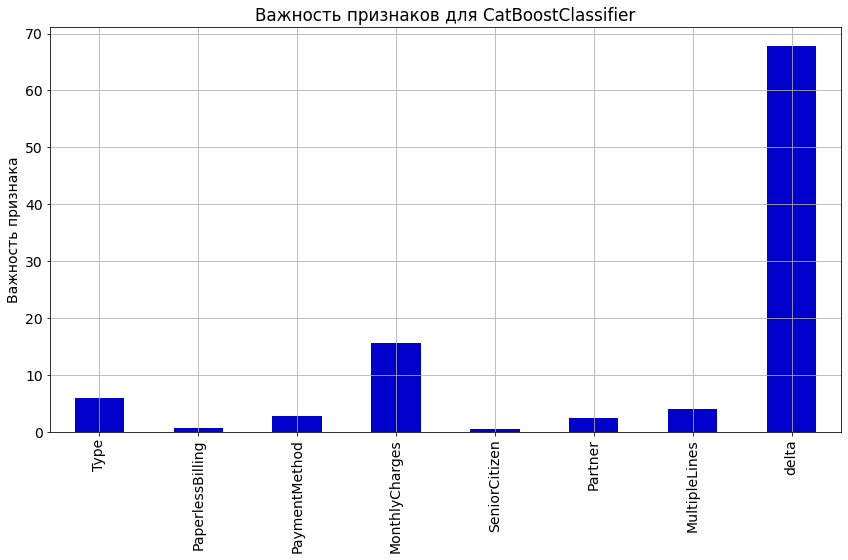

In [ ]:
feature_importance_cat = model_best.get_feature_importance()

feature_importance_cat = pd.Series(feature_importance_cat, index=X_test_or.columns)

plot_feature_importance(feature_importance_cat, fsize=(12, 8), name='CatBoostClassifier')
plt.show()

Для модели CatBoostClassifier основным признаком является 'delta', или время проведенное клиентом в компании, с огромным отрывом от остальных. Но, в том числе, для модели имеют значение такие признаки как: 'MonthlyCharges'

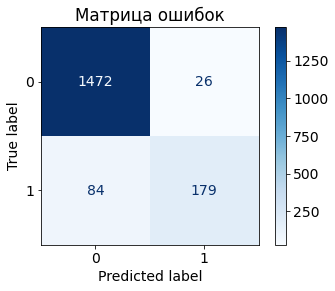

In [ ]:
disp = plot_confusion_matrix(model_best, X_test_or, y_test_or,
                             cmap=plt.cm.Blues,
                             values_format='.0f')
disp.ax_.set_title("Матрица ошибок")
plt.show()

Модель с очень высокой вероятностью предсказывает, что клиент останется в компании (98,3% случаев верных), но в то же время предсказывание, что клиент уйдет верно лишь в 61,9% случаев.
При прошлом кодировании (OE) результат на этой модели был лучше

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Интерпретация матрицы ошибок:

1. Точность (Accuracy) - отношение числа правильно классифицированных объектов ко всем объектам:
    - (1472 + 179) / (1472 + 26 + 84 + 179) = 0.939
    - метрика показывает, какую долю клиентов модель верно классифицировала в обоих классах (дали расшифровку выше).

2. Точность класса (Class Accuracy) - отношение числа правильно классифицированных объектов для каждого класса к сумме числа объектов в этом классе:
    - 1472 / (1472 + 26) = 0.983 (98.3% оставшихся клиентов модель предсказала)
метрика показывает, какую долю клиентов, которые остались, модель верно классифицировала.
    - 179 / (179 + 84) = 0.681 (68.1% ушедших клиентов модель предсказала)
    - метрика показывает, какую долю клиентов, которые ушли, модель верно классифицировала.

3. Ложно-положительная частота (False Positive Rate) - отношение числа отрицательных объектов, которые были неправильно определены, к общему числу отрицательных объектов:
    - 84/(84+1472)=0.054
    - то есть 5.4% от всех клиентов, которые остались, были неправильно прогнозированы как ушедшие.

4. Ложно-отрицательная частота (False Negative Rate) - отношение числа положительных объектов, которые были неправильно определены, к общему числу положительных объектов:
    - 26/(26+179)=0.127
    - то есть 12.7% от всех клиентов, которые ушли, были неправильно прогнозированы как оставшиеся.

5. Положительное предсказательное значение (Positive Predictive Value) - отношение числа положительных объектов, которые были правильно определены, к общему числу объектов, которые были предсказаны как положительные:
    - 179/(179+26)=0.873
    - то есть 87.3% от всех клиентов, которые были прогнозированы как ушедшие, действительно ушли.

6. Отрицательное предсказательное значение (Negative Predictive Value) - отношение числа отрицательных объектов, которые были правильно определены, к общему числу объектов, которые были предсказаны как отрицательные:
    - 1472/(1472+84)=0.946
    - то есть 94.6% от всех клиентов, которые были прогнозированы как оставшиеся, действительно остались.
    
</div>

## Итоговый отчет

### Ключевые шаги в работе над проектом

1. Загрузка и изучение данных:
    - Подключил все требуемые для проекта библиотеки
    - Загрузил данные
    - Получил общие данные о таблицах (наличие дубликатов, тип данных, размер таблиц, информация)
    - Получил статистически сводки таблиц
    
2. Предобработка данных:
    - Конвертировал данные в необходимый тип
    - Привел категориальные признаки к нижнему регистру
    - Объединил таблицы в единую
    - Обработал оброзовавшиесся после объединения пропуски
    - Создал столбец с целевым признаком 'leave' (где 1 - клиент ушел, 0 - клиент действующий), на основании столбца 'EndDate'
    - Для оставшихся клиентов заменил значение 'no' в столбцу 'EndDate' на дату выгрузки данных (01 февраля 2020 года)
    - Создал столбец 'delta' отражающий количество дней  действующего договора (от начала до разрыва) для каждого клиента
    
3. Анализ данных:
    - Подготовил функции для анализа графиков, построил и проанализировал графики:
    - Сделал матрицу корреляций всех признаков
    - Сделал анализ на мультиколлинеарность
    - По результатам анализа удалил сильно коррелирующие признаки, а так же отказался от признаков не влияющие на целевой
    
4. Подготовка данных к обучению:
    - Разделил данные на тренировочную и тестовую выборки в соотношении 3 к 1
    - Произвел кодировку данных методами OrdianlEncoder и OneHotEncoder (для каждого метода шифрования отдельная выборка)
    - Был изучен масштаб и баланс классов
    - Создал функции для обучения моделей (с применением стандартизации и поиска оптимальных гиперпараметров)
    
5. Обучение моделей:
    - Были обучени следующие модели:
        - LogisticRegression
        - RandomForestClassifier
        - LGBMClassifier
        - AdaBoostClassifier
        - CatBoostClassifier
    - Выбор и проверка лучшей модели:
        - Модель CatBoostClassifier, со следующими значениями:
            - ROC-AUC: 0.932
            - Accurace: 0.937
    - Анализ важности признаков для итоговой модели
    - Построение матрицы ошибок с интерпретацией по каждой метрике
    
6. Итоговый отчет

### Анализ соответствия фактической работы запланированным шагам

В процессе работы над проектом все запланированные шаги были выполнены.

В итоговом видел добафились дополнительные действия, такие как:
   - Построение матрицы корреляций и анализ на мультиколлинеарность
   - Удаление части признаков после анализа
   - Кодирование признаком изначально предполагал одним методом, в финальной версии проекта использовал 2 метода

### Рефлексия над сложностями и описание путей их решения

В процессе работы над проектом возникали сложности на разных этапах:

1. При определении целевого признака отталкивался от заполненного признака 'EndDate', что в конкретном датасете не вызвало бы проблем, но при других стечениях обстоятельств исказило бы данные для анализа. Путем решения стало создание целевого признака по значению 'No' в столбце 'EndDate'
2. Построение матрицы корреляций принимало только интервальные значения, при построении методом Пирсона не получалась связать числовые и категориальные признаки. Выходом из ситуации стало использование библиотеки Phik с ручным определением интервальных признаков
3. При выборе метода шифрования OrdinalEncoder не подходил для линейной регрессии, при использовании OneHotEncoder проблемы появлялись на други моделях обучения. Выходом стало создание 2 паралелльных наборов выборок, для каждого типа шифрования. При обучении моделей использовал соответствующие моделям обучения выборки

### Краткое описание предобработки данных (проблема - что делали)

1. При предобработке данных заполнил пропуски в столбцу 'TotalCharges' для клиентов пришедших в день выгрузк датасета. Значения для этих случаев взял из столбца 'MonthleCharges' руководствуясь логикой, что клиенты не уйдут в первый месяц и ежемесячный платеж совершат

2. Признаки 'BeginDate' преобразовал в формат DateTime

3. Привел следующие категориальный признаки к нижнему регистру:
    - customerID
    - gender
    - Parther
    - Dependers
    - Type
    - PaperlessBilling
    - PaymentMethod
    
4. Объеденил все таблицы в одну используя опреацию 'merge'

5. После объединения всех таблиц в оду для ряда клиентов образовались пропуски в некоторым столбцах, которые были обусловлены тем, что конкретный клиент не пользовался одной или несколькими услугами компании, эти пропуски были заполнены значениями 'not used'

6. Создал целевой признак 'leave' (где 0 - клиент не ушел, 1 - клиент ушел) на базе значений столбца 'EndDate', при формировании признака 'leave' пользовался логикой, что есть у клиента есть заполненное значение даты в столбце 'EndDate' - значит клиент ушел, есть в столбце 'EndDate' стоит значение 'No', то клиент не ушел из компании, а значит действующий

7. Для дальнейшего анализа и работы с датами значения 'No' столбца 'EndDate' заменил значением соответсвующим дате выгрузки датасета (01 февраля 2020 года)

8. Был добавлен столбец 'delta' отражающий длительность использования услуг для каждого пользователя

### Итоговый список признаков (с расшифровкой) для обучения модели, способы их обработки

Список признаков от которых отказался:
- Столбцы InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies сильно коррелируют с признаком monthly_charges, поэтому их необходимо удалить
- Столбец TotalCharges сильно коррелирует со столбцом delta, поэтому удалим столбец TotalCharges
- Столбец customerID не несет ценности при поиске корреляций, можно удалить
- Столбец EndDate имеет слишком высокое значение корреляции (1) с целевым признаком, необходимо удалить
- Столбец gender имеет практически нулевое значение корреляции, от него можно избавиться
- Столбец Dependents очень клабо коррелируется с целевым признаком leave, удаляем
- Столбец BeginDate имеет слишком сильную корреляцию с образованным столбцом delta, т.к. продолжительность пользования услуг клиентом важнее даты начала, удаляем столбец

Итоговый список признаков:
- senior_citizen — наличие пенсионного статуса по возрасту,
- partner — наличие супруга(и),
- type — тип оплаты: ежемесячный, годовой и тд,
- paperless_billing — безбумажное выставление счета,
- payment_method — способ оплаты,
- monthly_charges — ежемесячные траты на услуги по договору,
- multiple_lines — наличие возможности ведения параллельных линий во время звонка
- delta — срок пользования услугами в днях.

Целевой признак:
- leave - ушел ли клиент из компании

Кодирование категориальны признаков производилось с помощью OneHotEncoder() - для линейной модели и OrdinalEncoder() - для остальных моделей.

Стандартизация количественных признаков производилось с помощью StandardScaler()

### Сводная таблица исследованых моделей и их метрика на кросс-валидации

In [ ]:
np.round((pd.concat([results_lg, results_forest, results_lgbm_class,
           results_ada_boost, results_cat], axis=1)), 3)

,LogisticRegression,RandomForestClassifier,LGBMClassifier,AdaBoostClassifier,CatBoostClassifier
AUC-ROC,0.754,0.833,0.893,0.898,0.921


### Лучшая модель - название, гиперпараметры, метрика на кросс-валидации

Лучшая модель - CatBoostClassifier

Гиперпараметры модели
params = {
    'iterations': 500,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 1,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'random_state': RANDOM_STATE
}

Где RANDOM_STATE = 280823

ROC-AUC: 0.932

### Итоговая метрика на test (AUC-ROC и Accuracy)

CatBoostClassifier.

Acc: 0.937 (по требованию заказчика)

ROC-AUC: 0.931

Интерпретация метрики Accuracy:

Измеряет долю правильных ответов модели на тестовом наборе данных. Она вычисляется как отношение количества правильных предсказаний к общему числу предсказаний.

В нашем случае метрика равна 0,937, т.е. модель правильно предсказала классы для, практически, 94 объектов из 100

### Матрица ошибок (график + интерпретация)

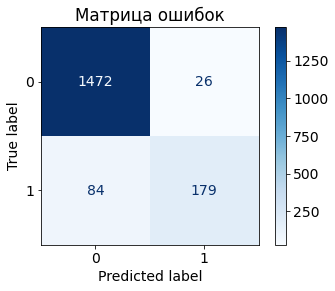

In [ ]:
disp = plot_confusion_matrix(model_best, X_test_or, y_test_or,
                             cmap=plt.cm.Blues,
                             values_format='.0f')
disp.ax_.set_title("Матрица ошибок")
plt.show()

Интерпретация матрицы ошибок:

1. Точность (Accuracy) - отношение числа правильно классифицированных объектов ко всем объектам:
    - (1472 + 179) / (1472 + 26 + 84 + 179) = 0.939
    - метрика показывает, какую долю клиентов модель верно классифицировала в обоих классах (дали расшифровку выше).

2. Точность класса (Class Accuracy) - отношение числа правильно классифицированных объектов для каждого класса к сумме числа объектов в этом классе:
    - 1472 / (1472 + 26) = 0.983 (98.3% оставшихся клиентов модель предсказала)
метрика показывает, какую долю клиентов, которые остались, модель верно классифицировала.
    - 179 / (179 + 84) = 0.681 (68.1% ушедших клиентов модель предсказала)
    - метрика показывает, какую долю клиентов, которые ушли, модель верно классифицировала.

3. Ложно-положительная частота (False Positive Rate) - отношение числа отрицательных объектов, которые были неправильно определены, к общему числу отрицательных объектов:
    - 84/(84+1472)=0.054
    - то есть 5.4% от всех клиентов, которые остались, были неправильно прогнозированы как ушедшие.

4. Ложно-отрицательная частота (False Negative Rate) - отношение числа положительных объектов, которые были неправильно определены, к общему числу положительных объектов:
    - 26/(26+179)=0.127
    - то есть 12.7% от всех клиентов, которые ушли, были неправильно прогнозированы как оставшиеся.

5. Положительное предсказательное значение (Positive Predictive Value) - отношение числа положительных объектов, которые были правильно определены, к общему числу объектов, которые были предсказаны как положительные:
    - 179/(179+26)=0.873
    - то есть 87.3% от всех клиентов, которые были прогнозированы как ушедшие, действительно ушли.

6. Отрицательное предсказательное значение (Negative Predictive Value) - отношение числа отрицательных объектов, которые были правильно определены, к общему числу объектов, которые были предсказаны как отрицательные:
    - 1472/(1472+84)=0.946
    - то есть 94.6% от всех клиентов, которые были прогнозированы как оставшиеся, действительно остались.

### Важность признаков (график + комментарии)

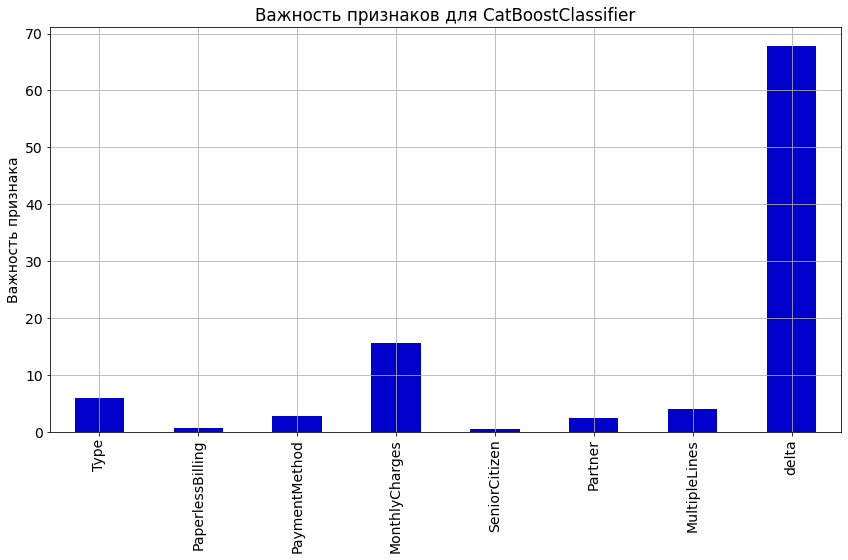

In [ ]:
feature_importance_cat = model_best.get_feature_importance()

feature_importance_cat = pd.Series(feature_importance_cat, index=X_test_or.columns)

plot_feature_importance(feature_importance_cat, fsize=(12, 8), name='CatBoostClassifier')
plt.show()

Для модели CatBoostClassifier основным признаком является 'delta', или время проведенное клиентом в компании, с огромным отрывом от остальных. Но, в том числе, для модели имеют значение такие признаки как: 'MonthlyCharges'.